# Task 4. Spectrogram

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 1. Add 4th wave packet (frequency = 4 and time_shift = 7 cycles). Demonstrate the effect on the plot of the FFT spectrum

In [41]:
def my_plot(x, y, title, xlabel, ylabel, fig_x_size=10, fig_y_size=7, font_param=16):
    plt.figure(figsize=(fig_x_size, fig_y_size))
    plt.plot(x, y, "g.--")    
    plt.title(title, fontsize=font_param)
    plt.xlabel(xlabel, fontsize=font_param)
    plt.ylabel(ylabel, fontsize=font_param)
    plt.xticks(fontsize=font_param)
    plt.yticks(fontsize=font_param)

In [44]:
def form_signal(n_timestamps = 4096):
    t=np.linspace(-20*2*np.pi, 20*2*np.pi, n_timestamps)
    y=np.sin(t)*np.exp(-t**2/2/20**2)                  # generate first  wave packets of harmonic signal
    y=y+np.sin(3*t)*np.exp(-(t-5*2*np.pi)**2/2/20**2)  # add      second wave packets of harmonic signal
    y=y+np.sin(5.5*t)*np.exp(-(t+10*2*np.pi)**2/2/10**2) # add      third  wave packets of harmonic signal
    return t, y

def new_signal(t, y, freq, time_shift):
    y=y=y+np.sin(freq*t)*np.exp(-(t-time_shift*2*np.pi)**2/2/10**2)
    return y

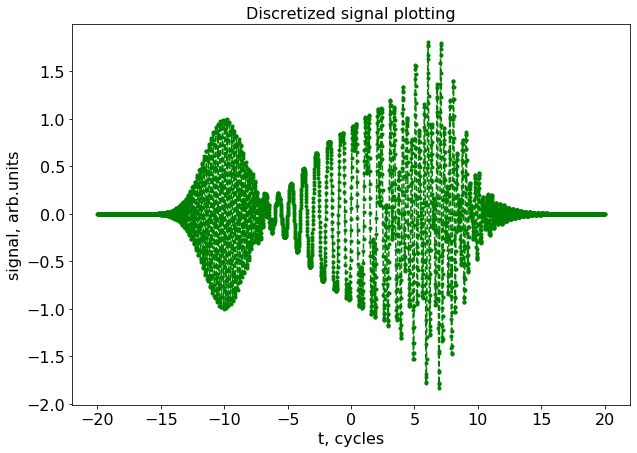

In [45]:
t, y = form_signal()
y = new_signal(t, y, 4, 7)
my_plot(t/2/np.pi, y, title="Discretized signal plotting", xlabel='t, cycles', ylabel='signal, arb.units')
plt.show()

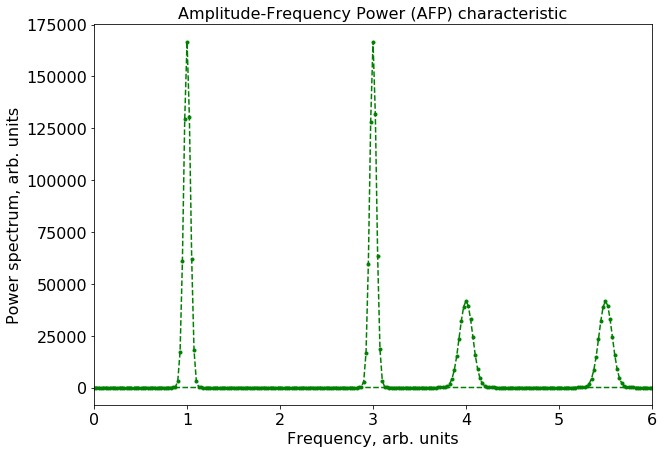

In [48]:
from numpy import fft, pi, exp

# Fourier spectrum
sp=fft.fft(y)                             # spectrum
w=fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi) # frequency
# plot(w, abs(sp)**2)

my_plot(w, abs(sp)**2, title="Amplitude-Frequency Power (AFP) characteristic", 
        xlabel='Frequency, arb. units', ylabel='Power spectrum, arb. units')
plt.xlim(0, 6)
plt.show()

In [49]:
# # windowed Fourier transform (Gabor transform, spectrogram)

# window_width=2.0*2*pi
# window_position=-5.0*2*pi
# window_function=exp(-(t-window_position)**2/2/window_width**2)

# y_window=y * window_function

# plot(t/2/pi, y)
# plot(t/2/pi, y_window);

# # now do the same for different window positions and plot 2D graph
# # x_axis is window position
# # y_axis is frequency
# # color axis represents the power spectrum

### 2. Implement the spectrogram, show the effect of 1 on the spectrogram. Don’t forget to label the axes

In [50]:
# def get_specgram(nwindowsteps=1000):

#     # your implementation here

#     return specgram

In [51]:
def window_function(t, window_position, window_width):
    return exp(-(t - window_position)**2 / 2 / window_width**2)

def get_specgram(window_width, nwindowsteps = 1000):
    t_window_positions=linspace(-20*2*pi, 20*2*pi, nwindowsteps)
    specgram = np.empty([len(t), len(t_window_positions)])

    for i,t_window_position in enumerate(t_window_positions):
        y_window = y*window_function(t, t_window_position, window_width)
        specgram[:, i] = abs(fft.fft(y_window))

    return specgram

def repeat_function(window_width, nwindowsteps=1000, repetitions=100):
    for _ in range(repetitions):
        get_specgram(window_width=window_width, nwindowsteps=nwindowsteps)
        
def my_imshow(x, y, z, title, xlabel, ylabel,
              grid_active=False, fig_x_size=12, fig_y_size=8, font_param=16):
    
    plt.figure(figsize=(fig_x_size, fig_y_size))
    plt.imshow(z, aspect='auto', origin='lower', 
               extent=[min(x)/2/pi, max(x)/2/pi, y[0], 2*w[int(len(x)/2)-1]])
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=font_param)
    plt.title(title, fontsize=font_param*1.3)
    plt.xlabel(xlabel, fontsize=font_param)
    plt.ylabel(ylabel, fontsize=font_param)
    plt.xticks(fontsize=font_param)
    plt.yticks(fontsize=font_param)
    plt.grid(grid_active)

In [28]:
# plot spectrogram, explain what you see

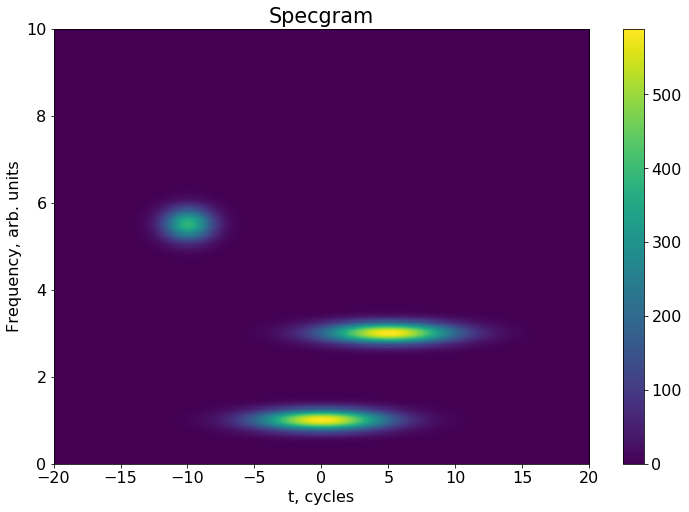

In [29]:
kappa = 1
window_width_given = kappa*2*pi
nwindowsteps_given = 1000

my_imshow(t, w, get_specgram(window_width=window_width_given, nwindowsteps=nwindowsteps_given), 
          title="Specgram", xlabel="t, cycles", ylabel="Frequency, arb. units")
# clim(0,0.5)
plt.ylim(0, 10)
plt.show()

### 3. Change the number of time steps in your signal to the power of 2 (i.e. 2**14) and then slightly change the number of timesteps. Measure the timing, can you explain the difference?

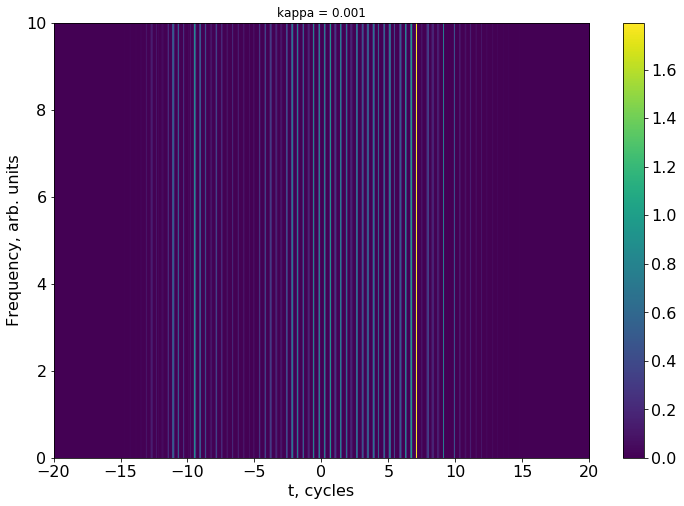

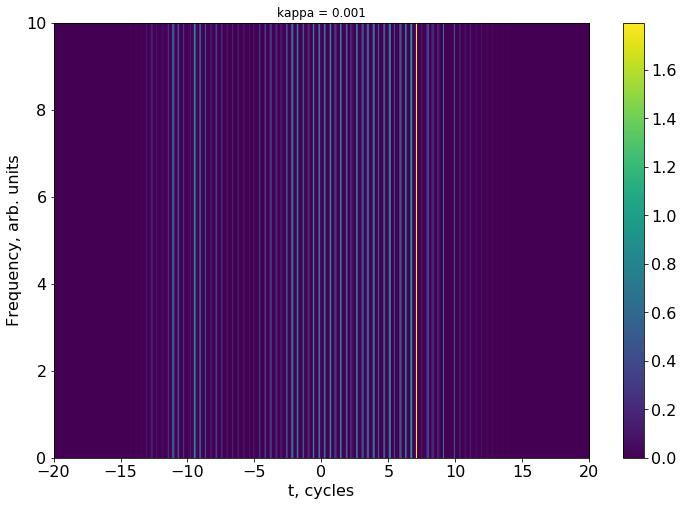

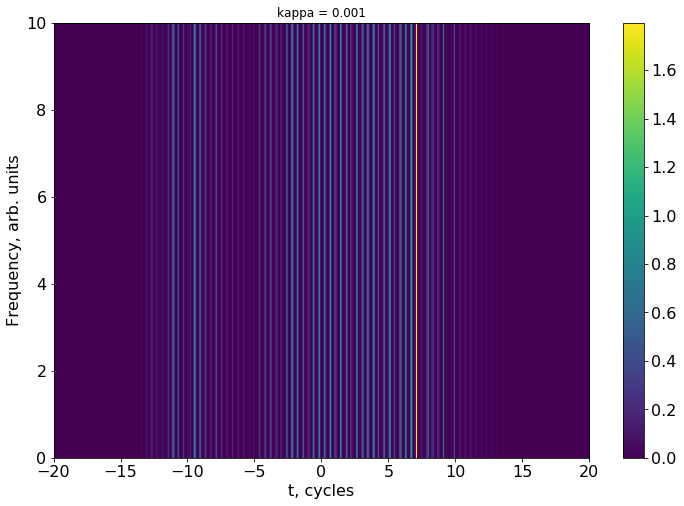

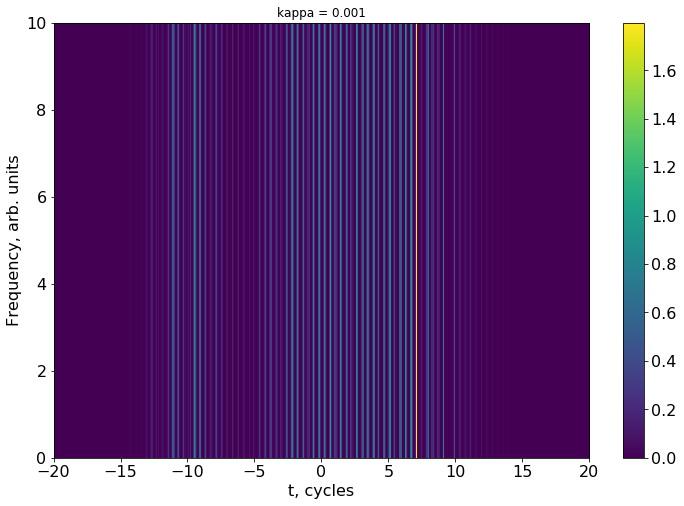

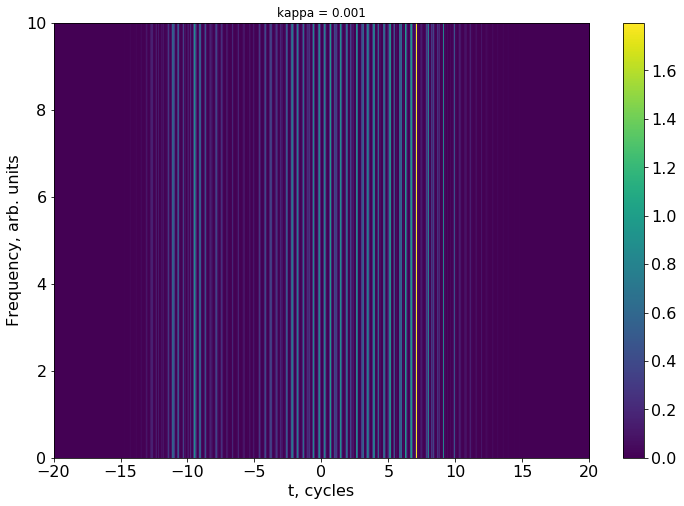

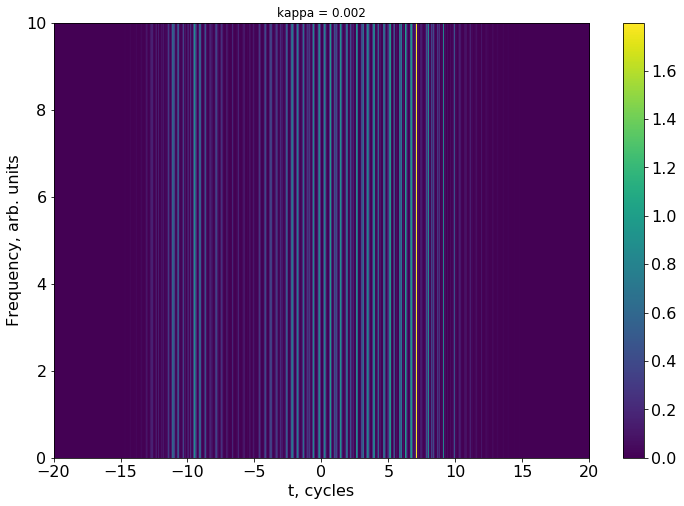

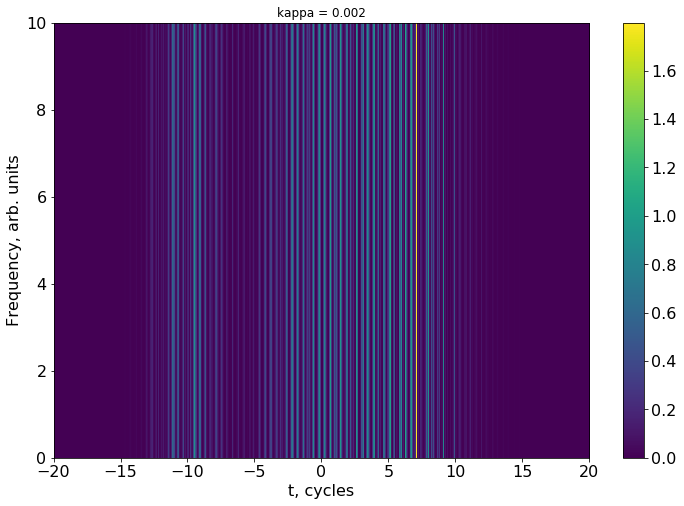

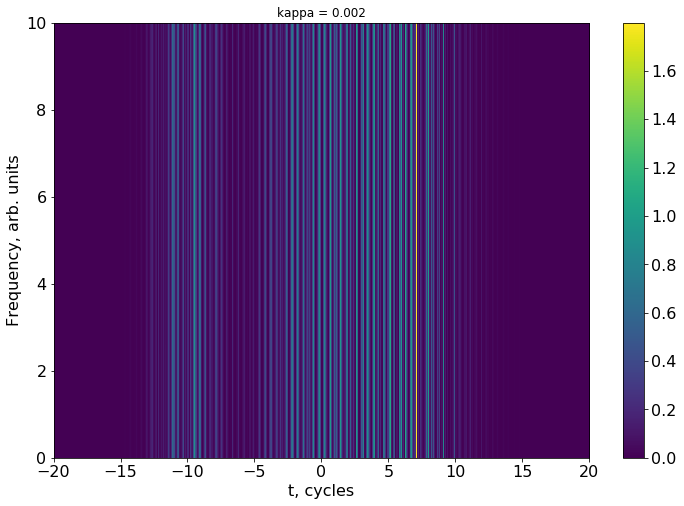

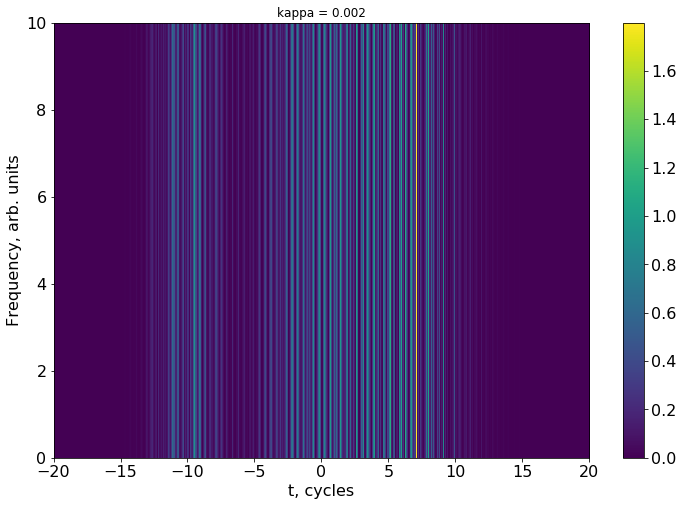

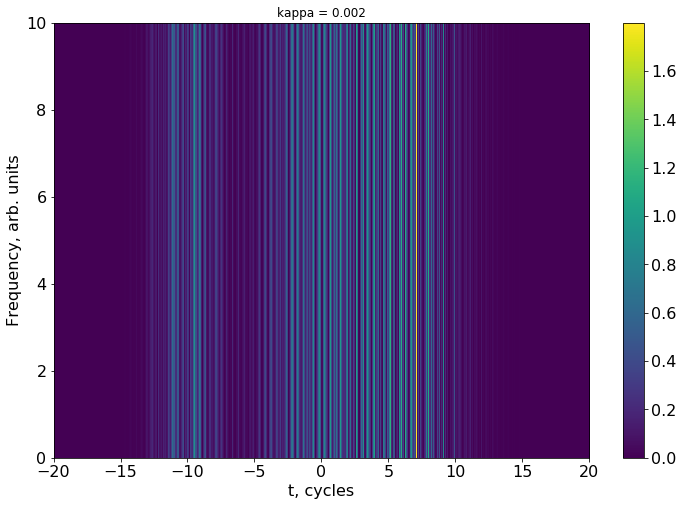

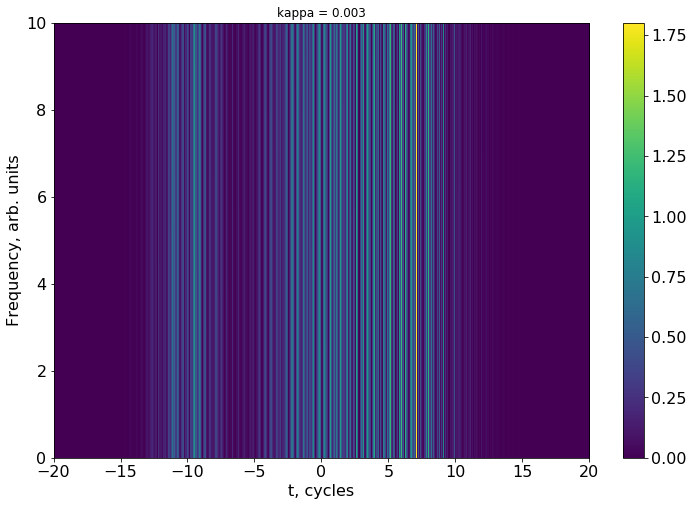

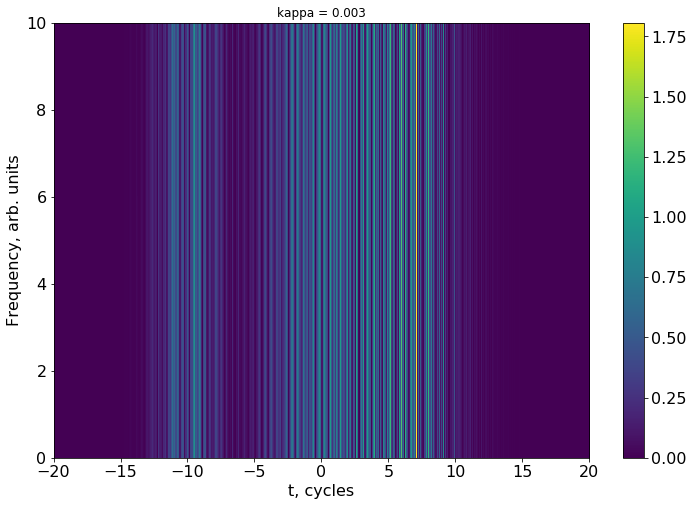

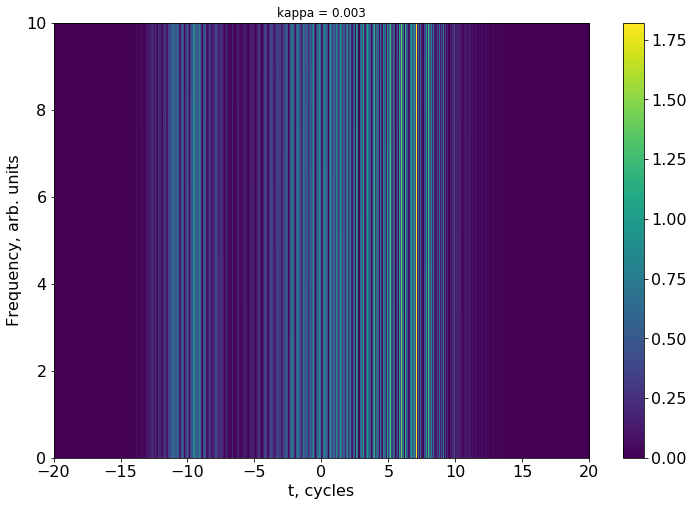

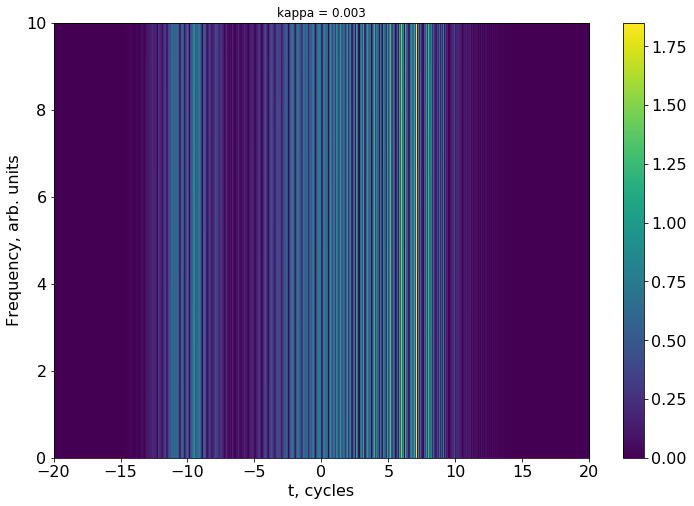

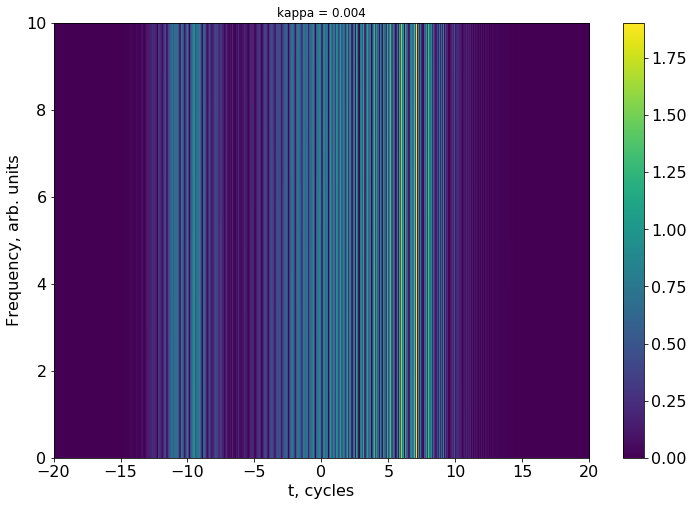

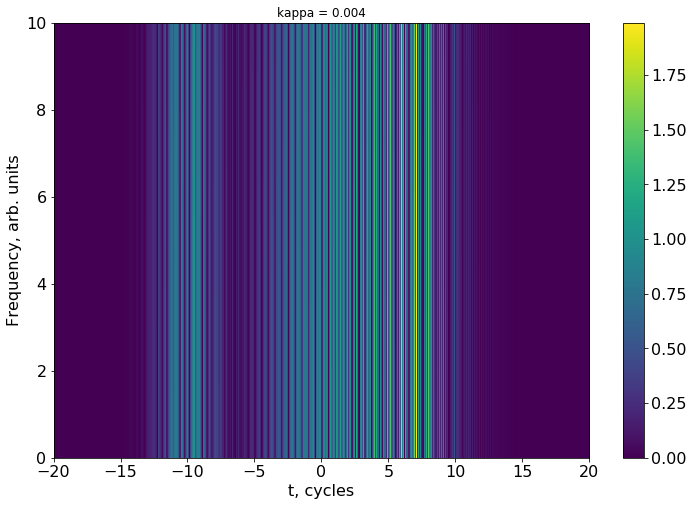

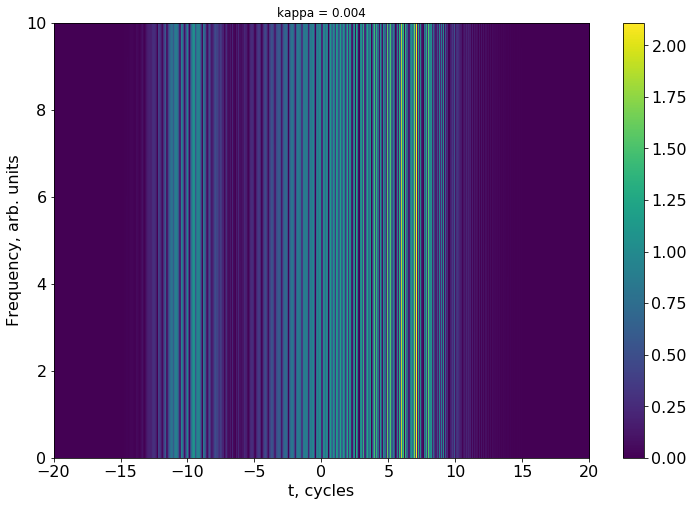

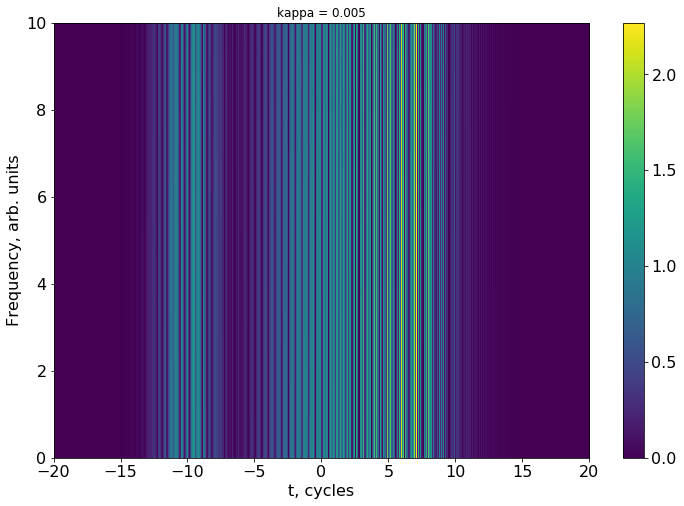

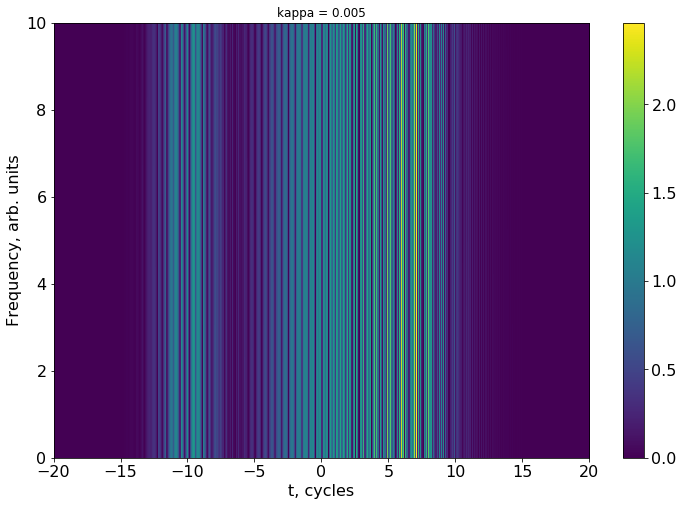

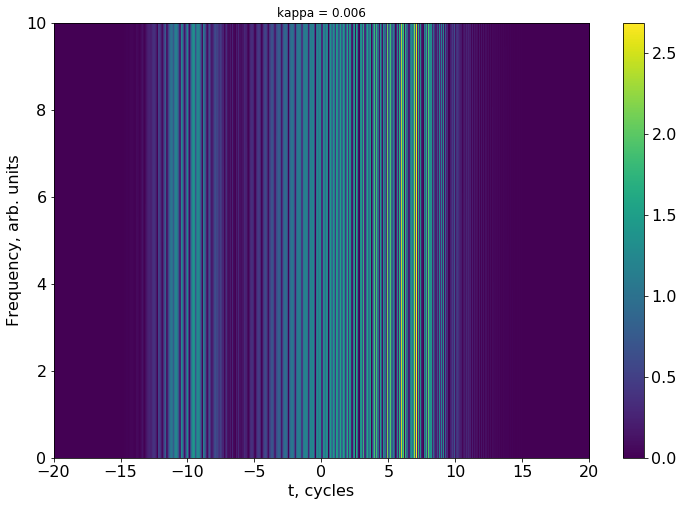

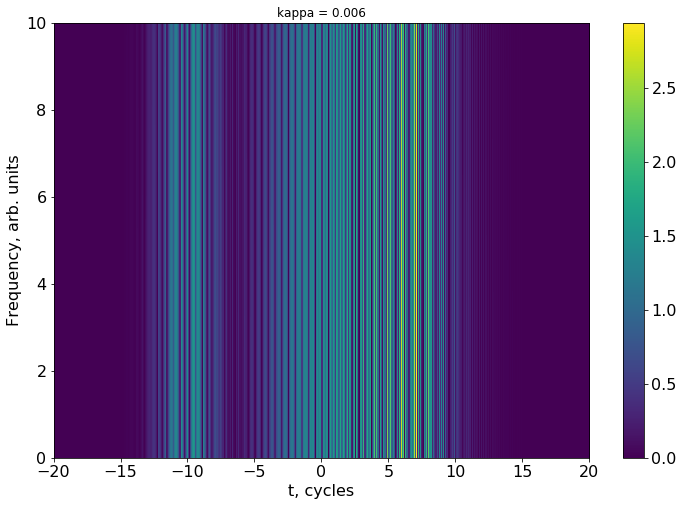

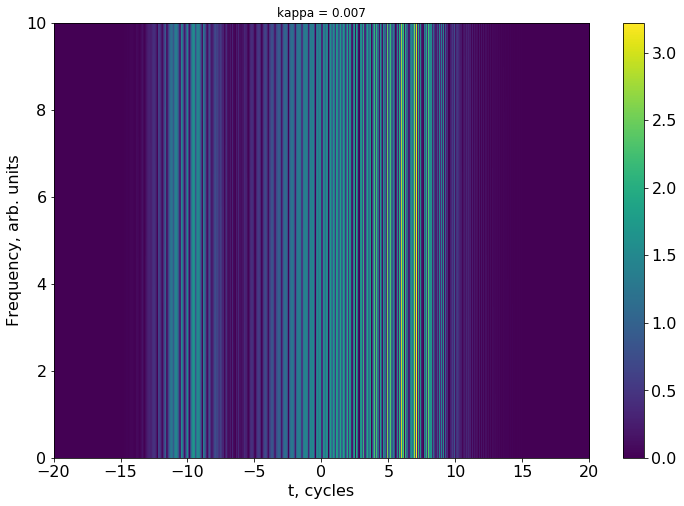

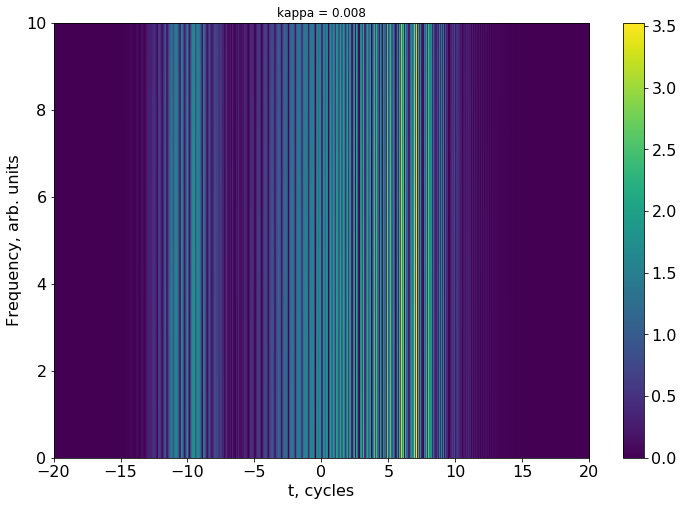

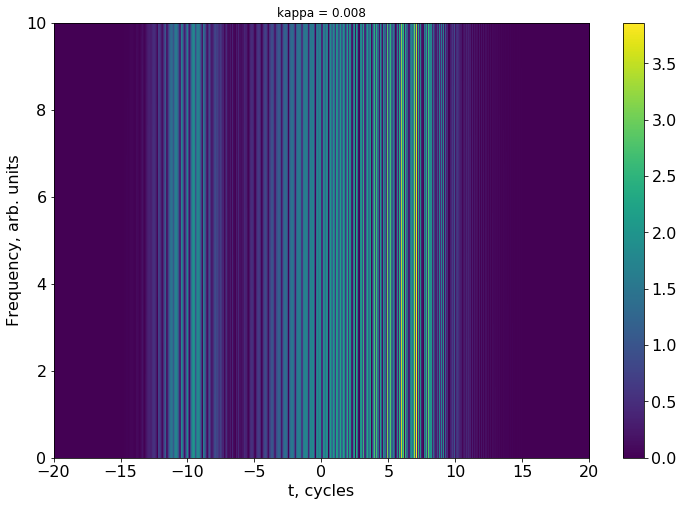

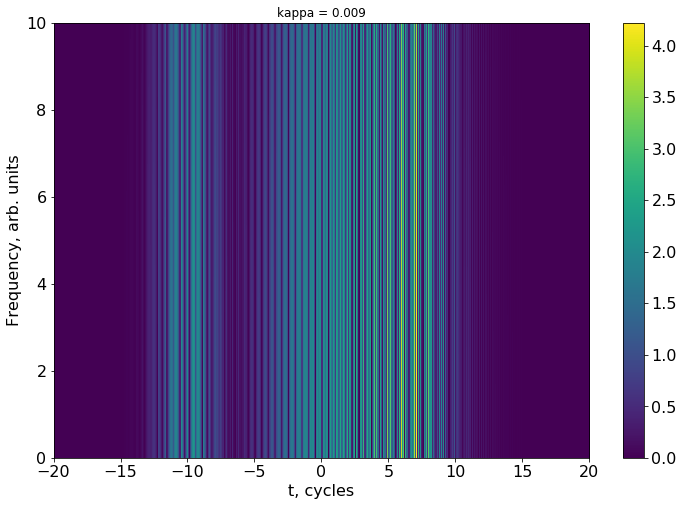

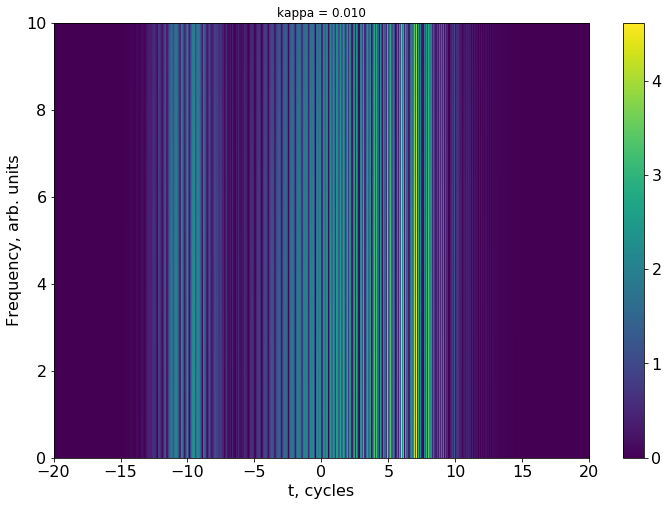

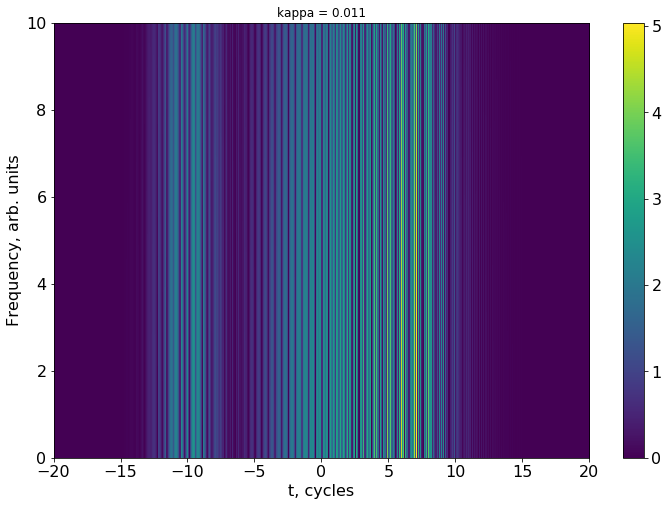

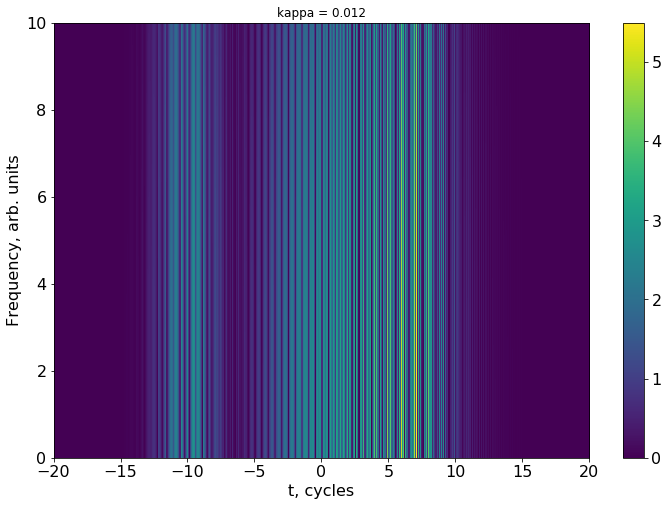

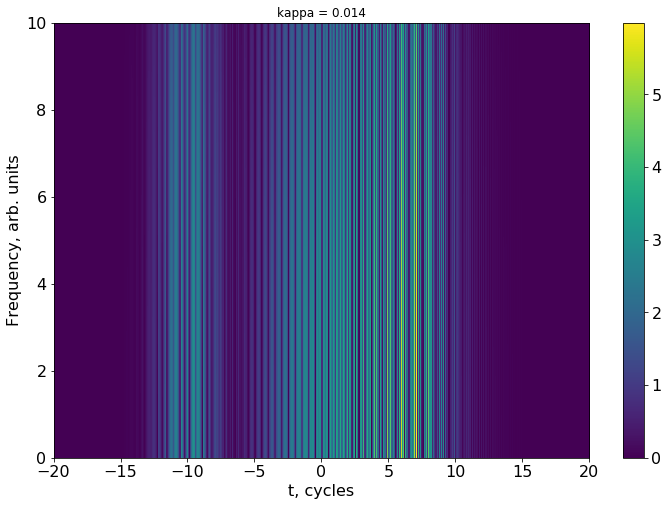

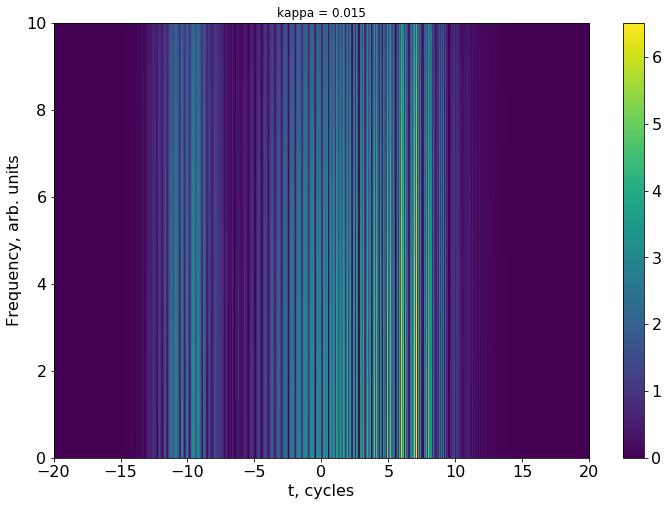

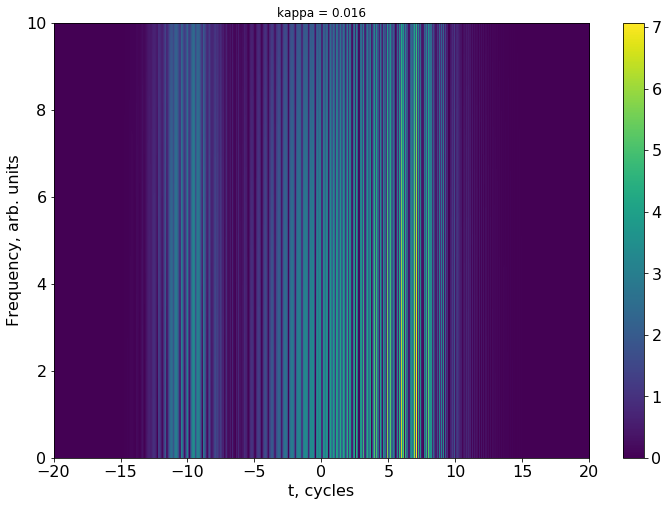

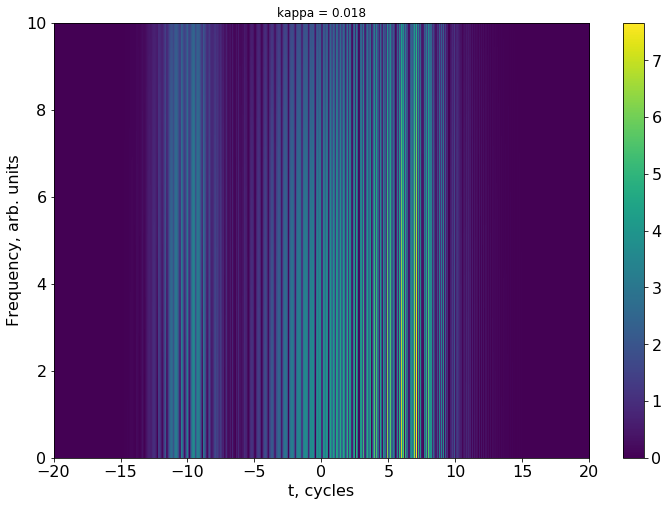

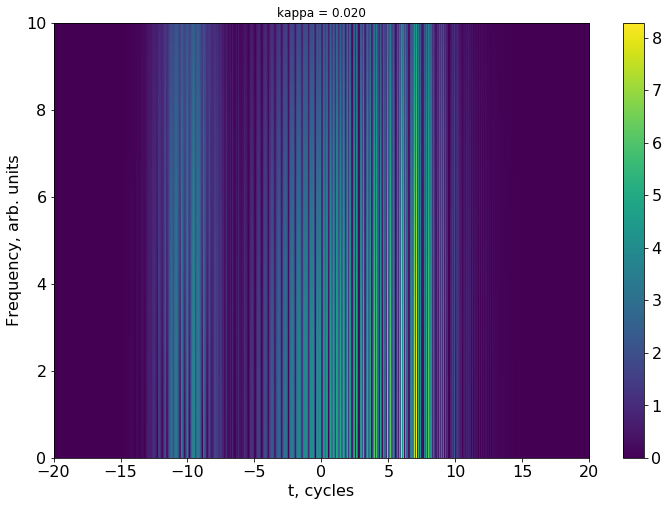

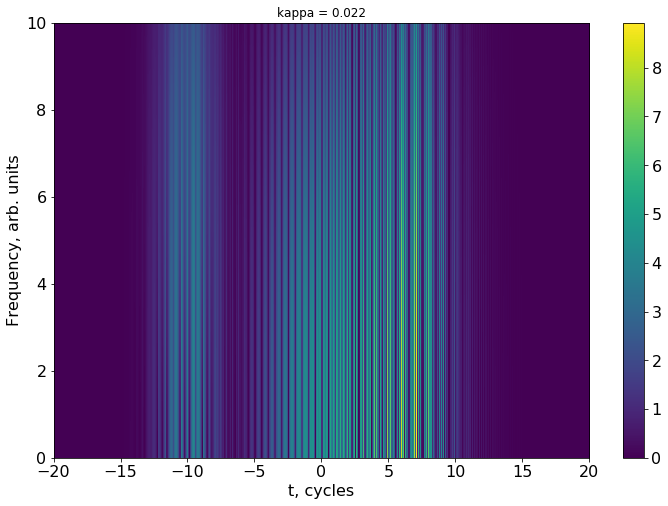

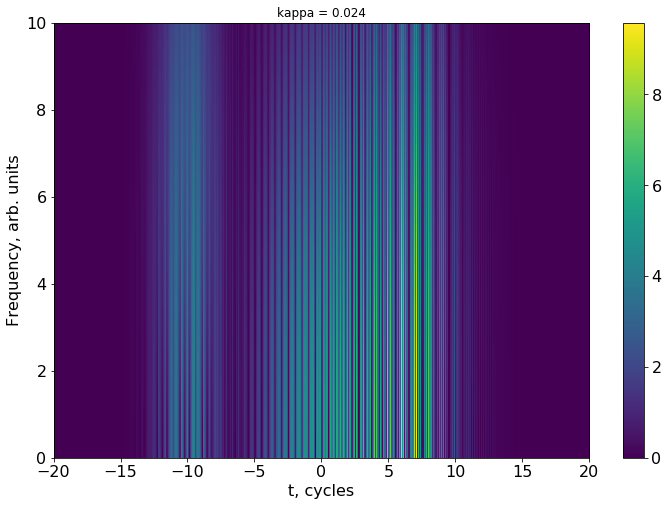

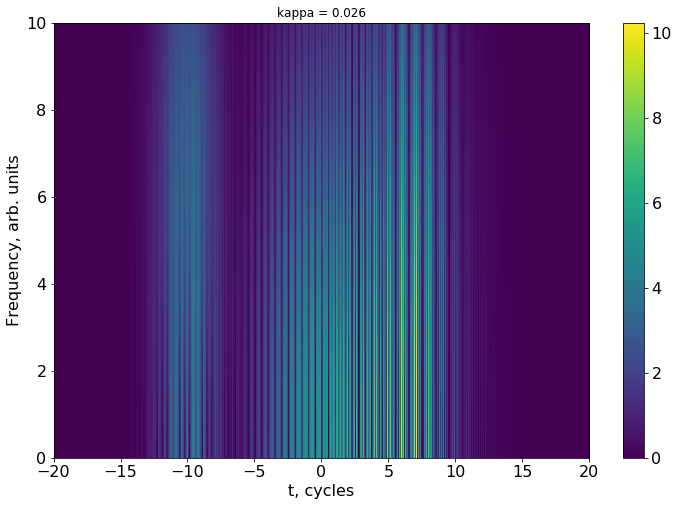

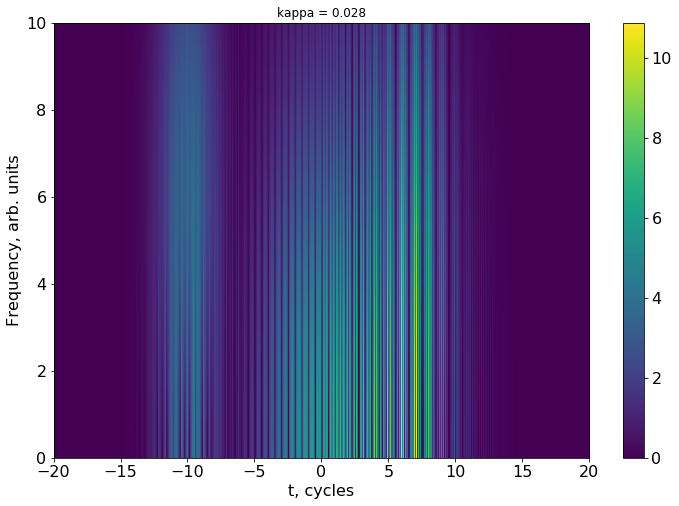

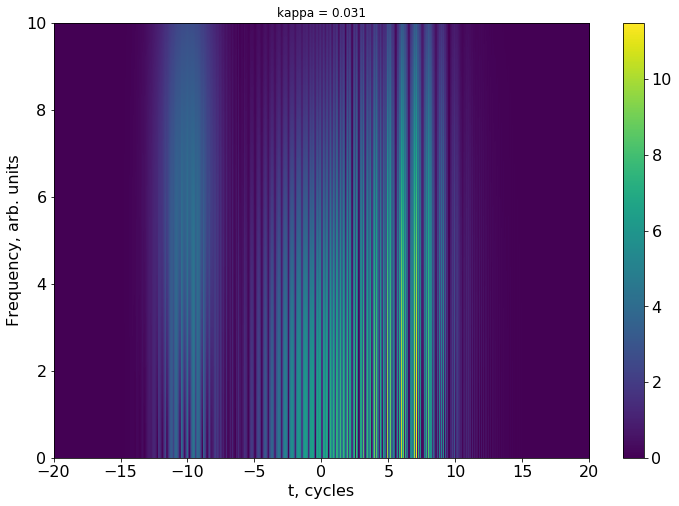

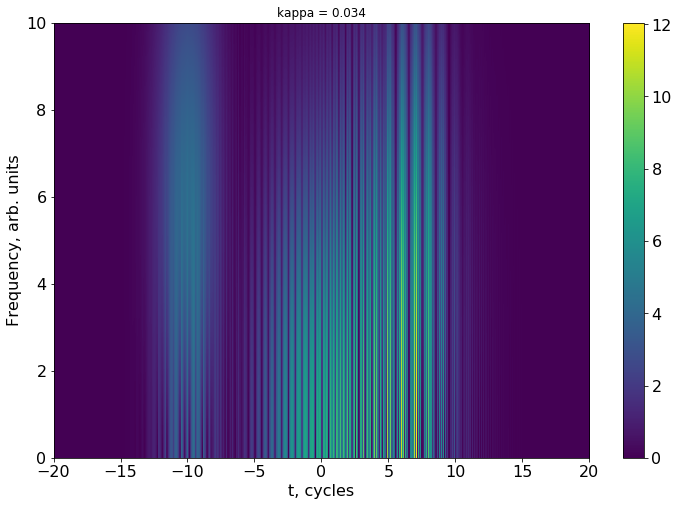

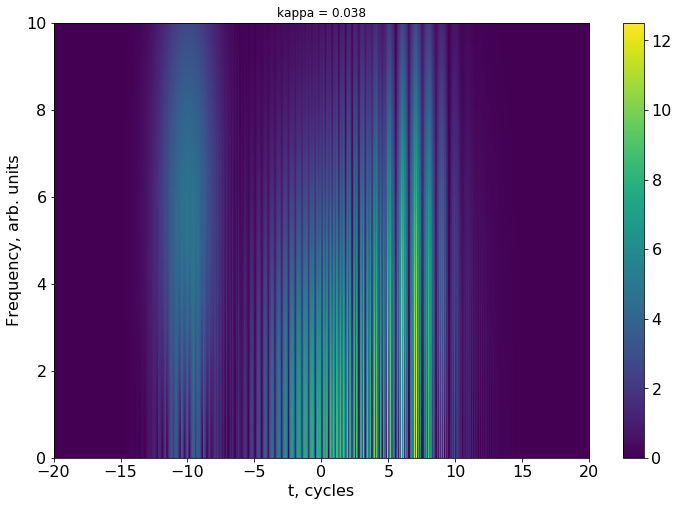

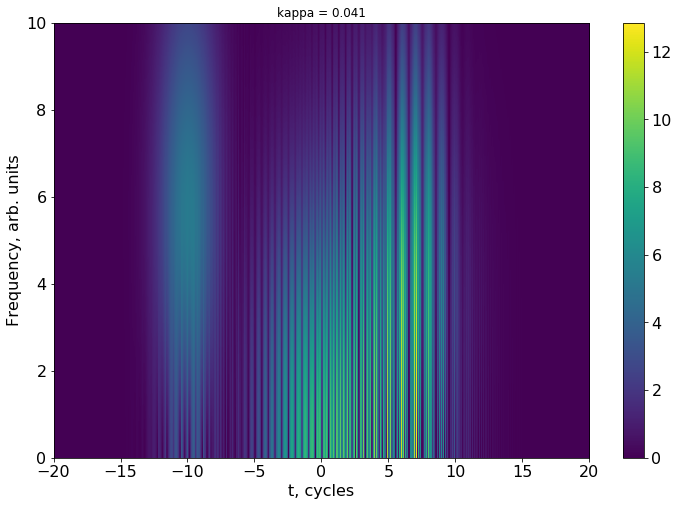

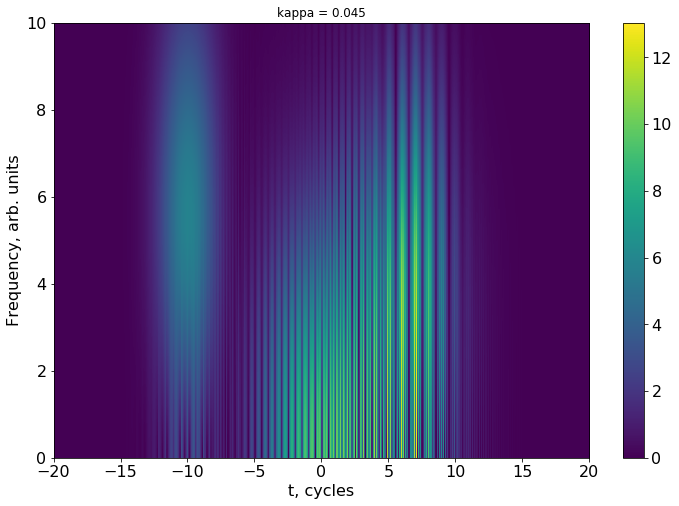

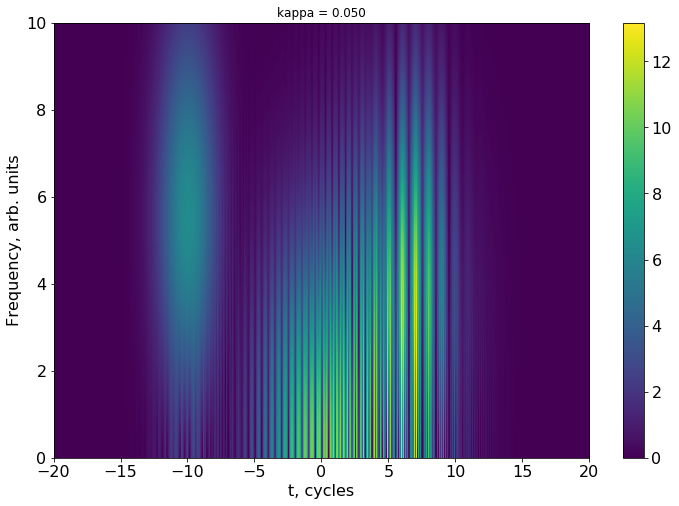

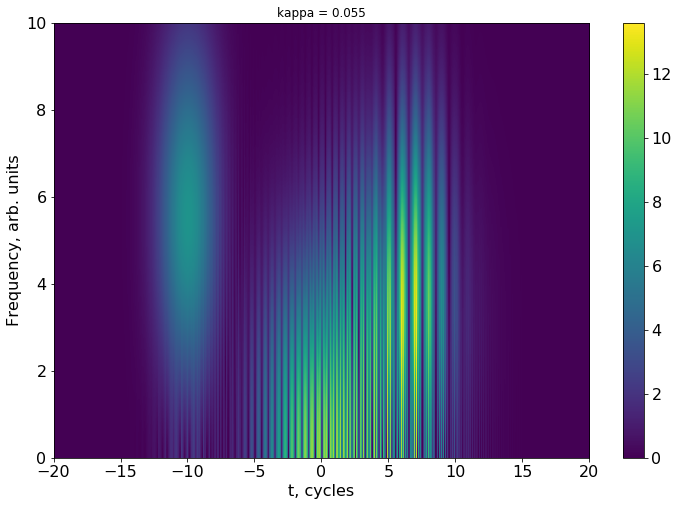

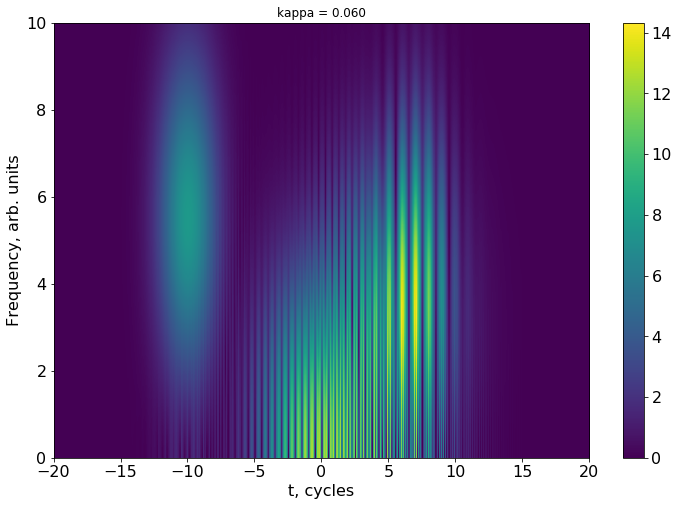

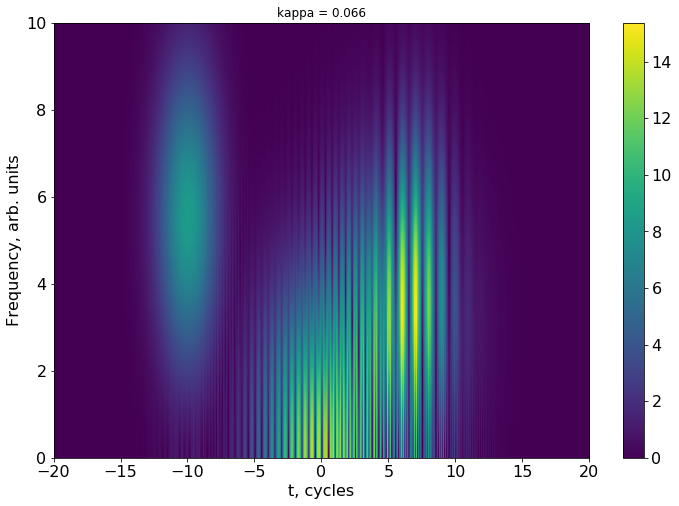

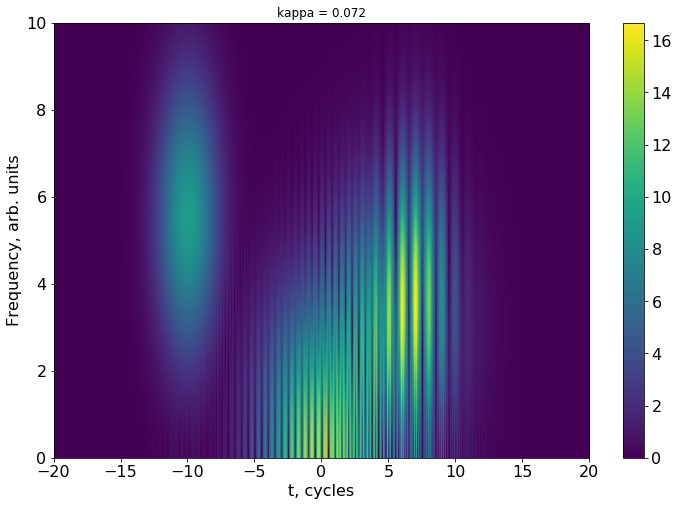

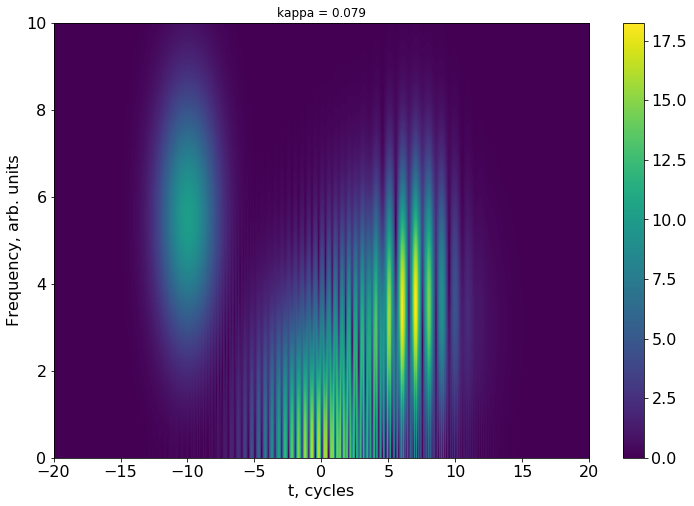

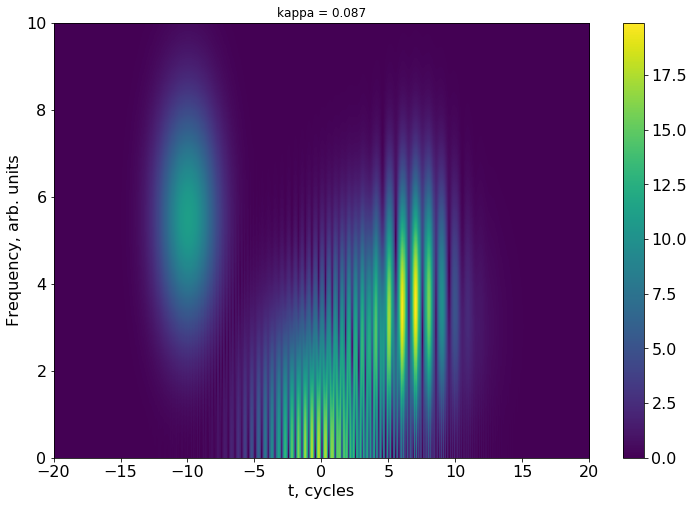

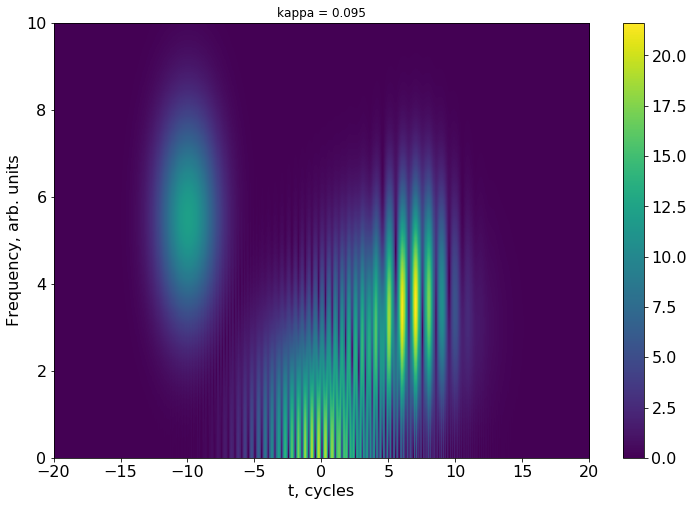

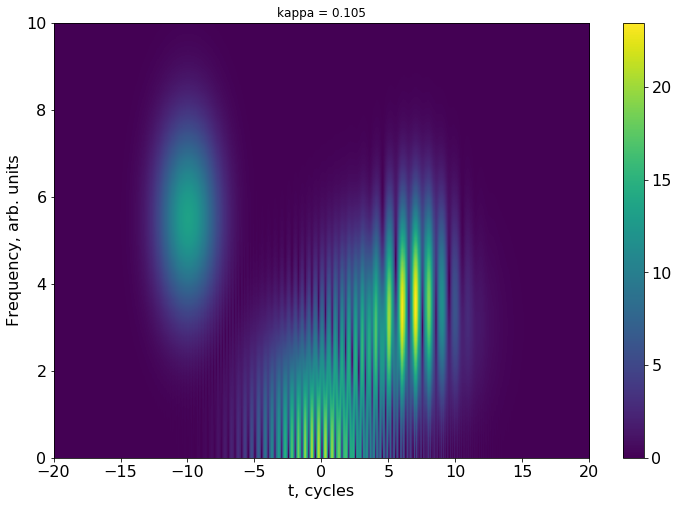

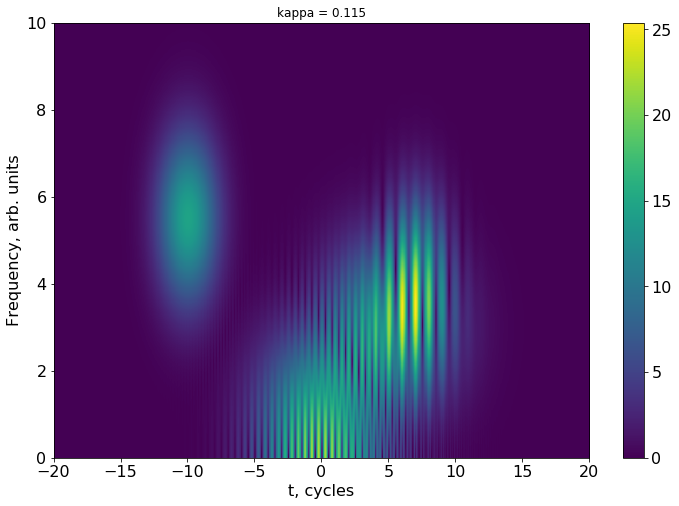

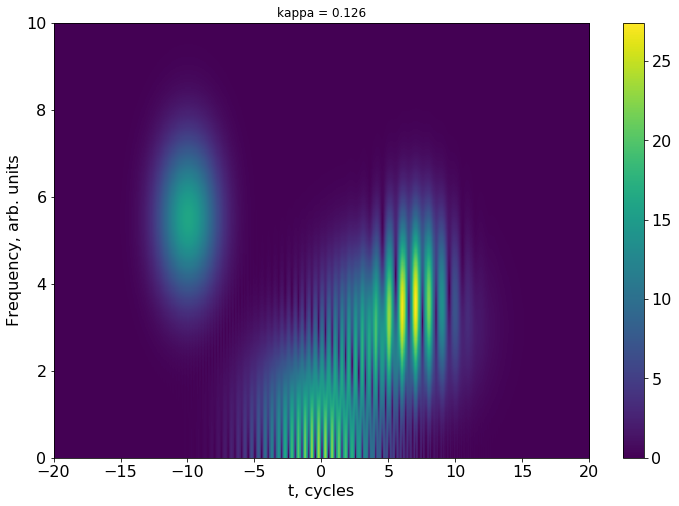

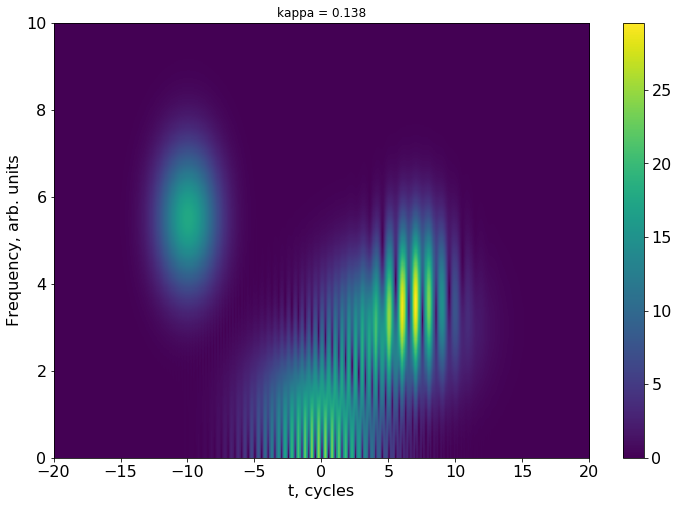

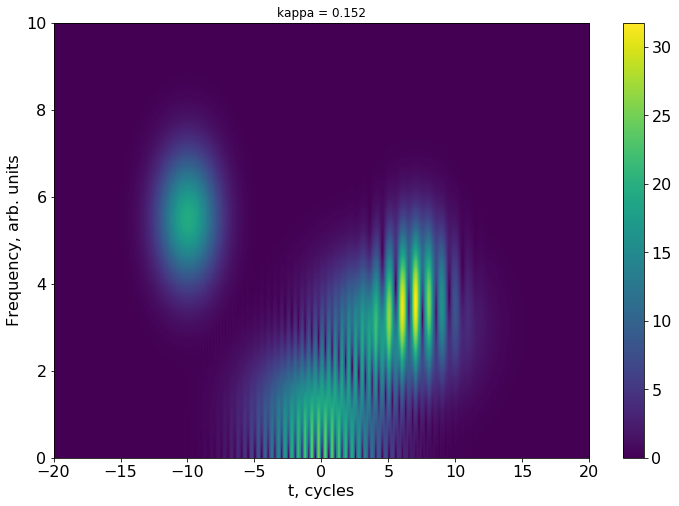

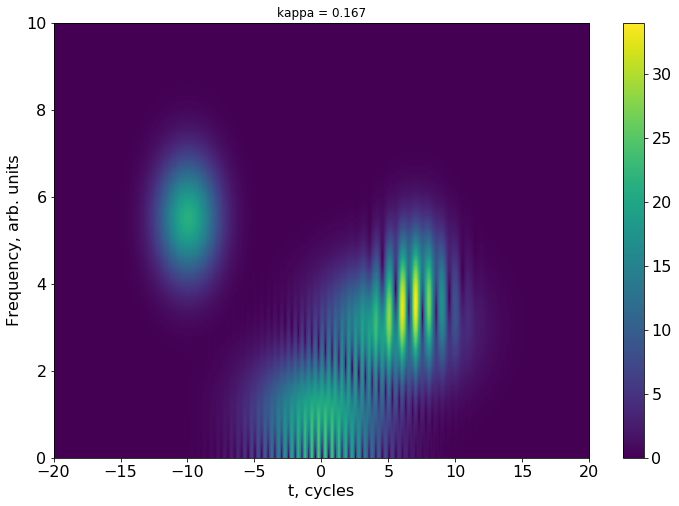

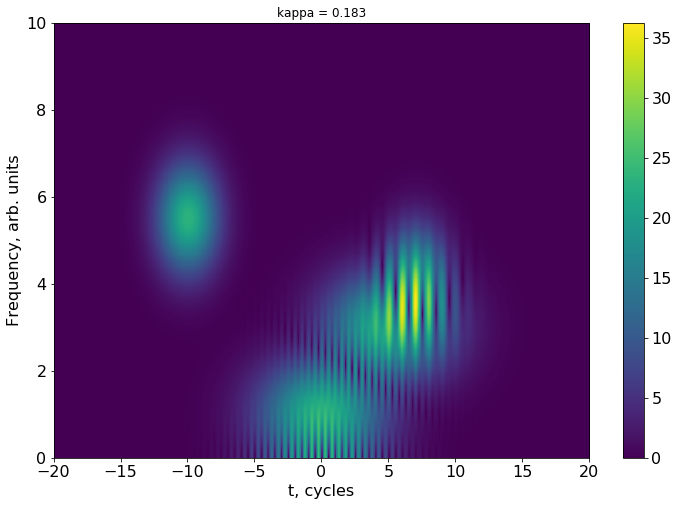

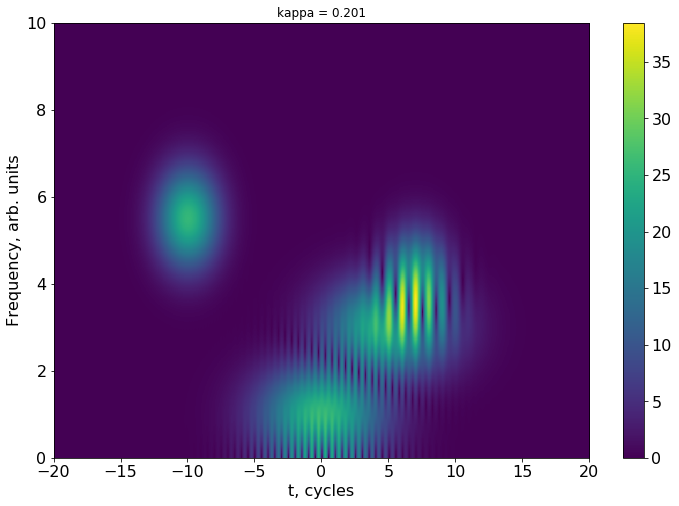

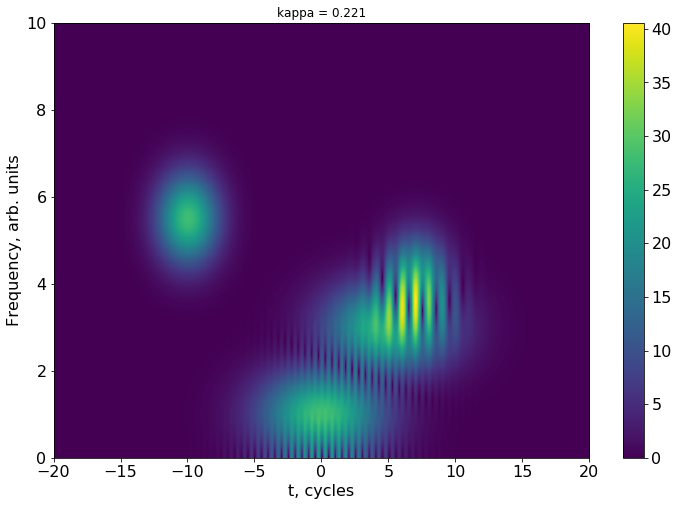

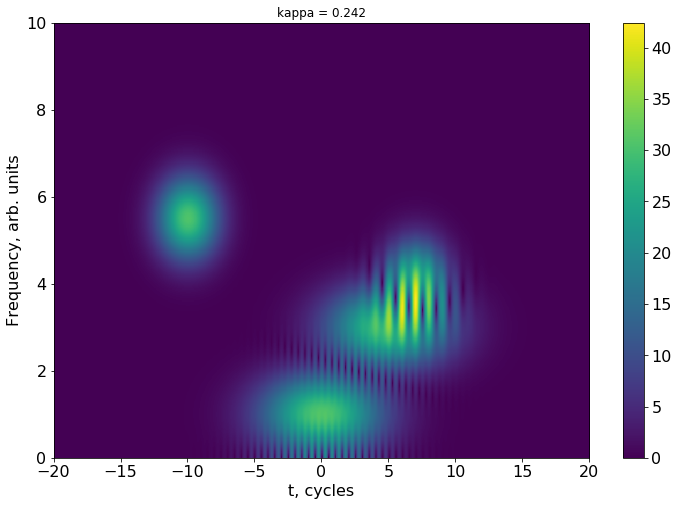

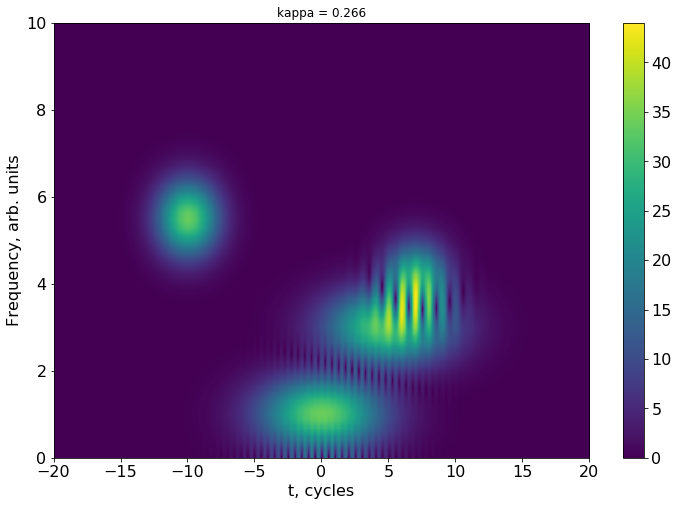

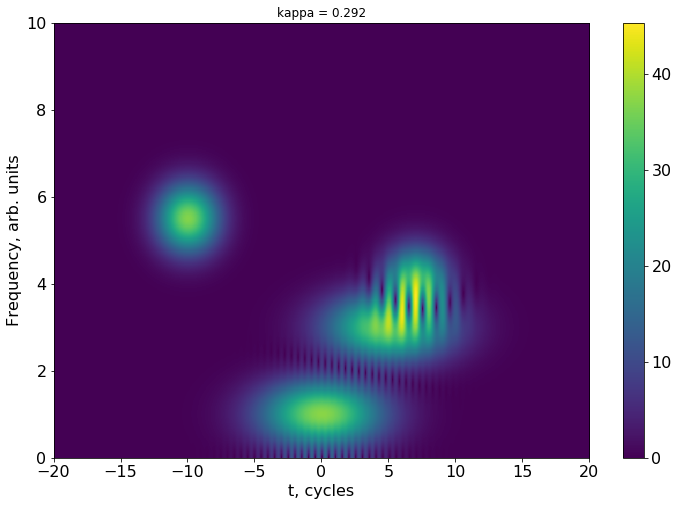

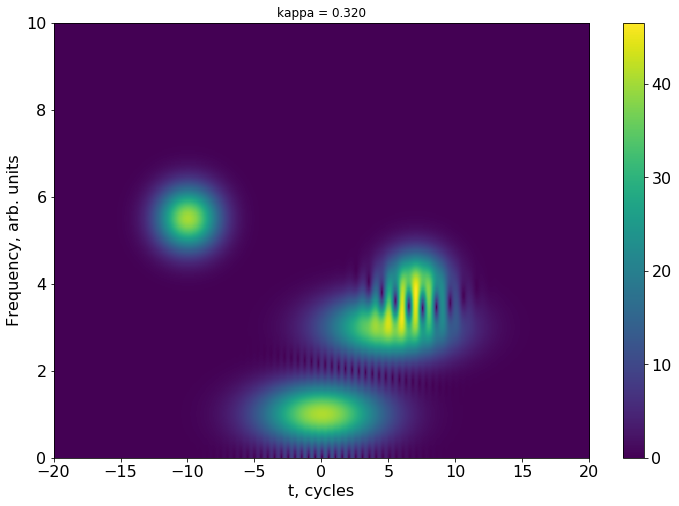

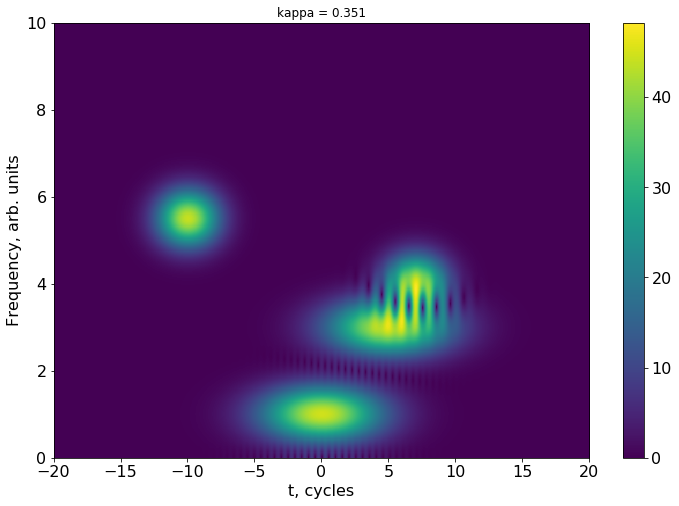

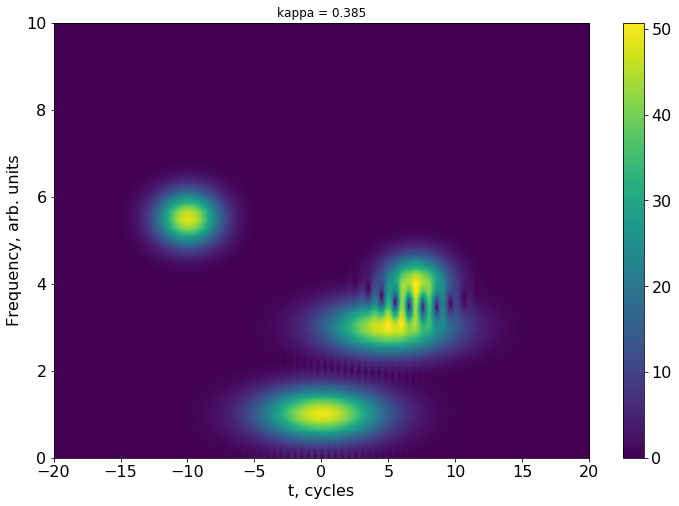

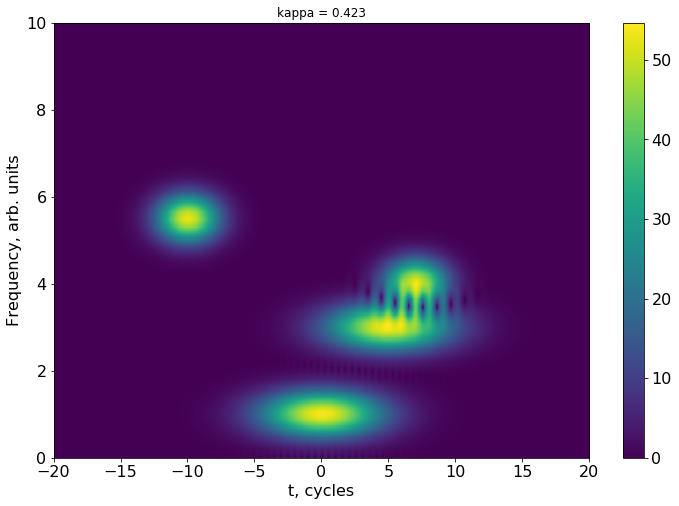

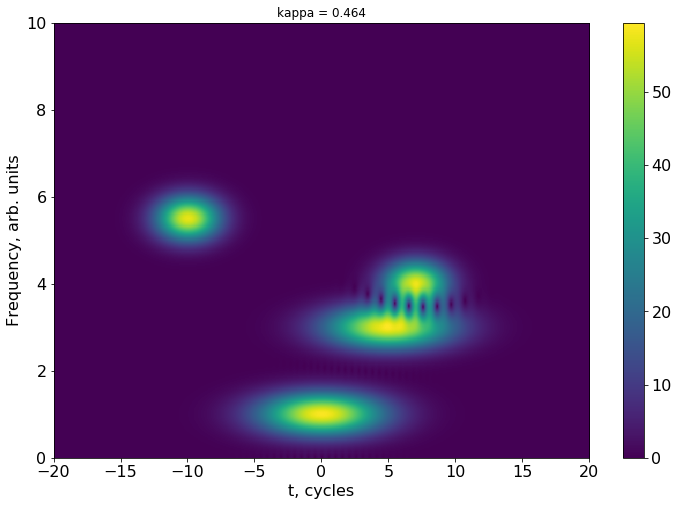

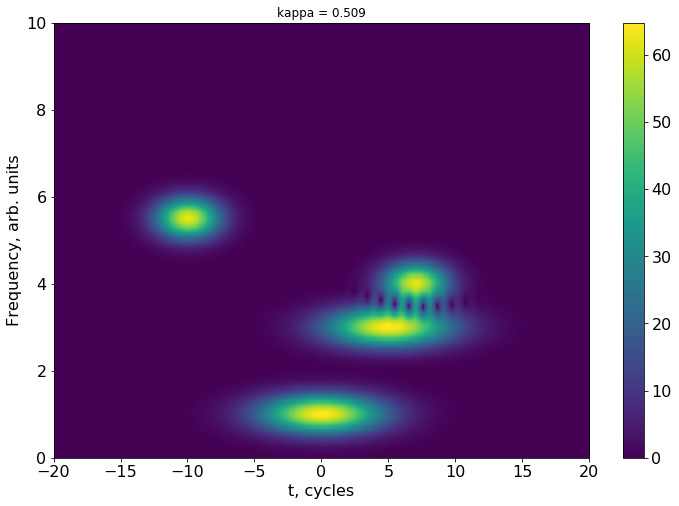

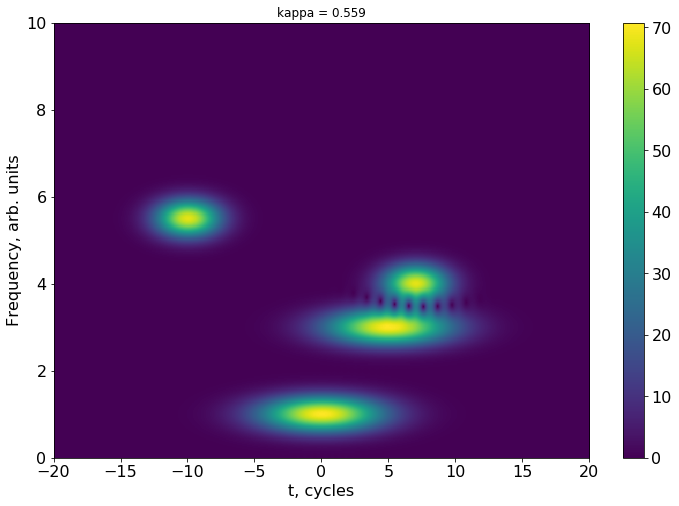

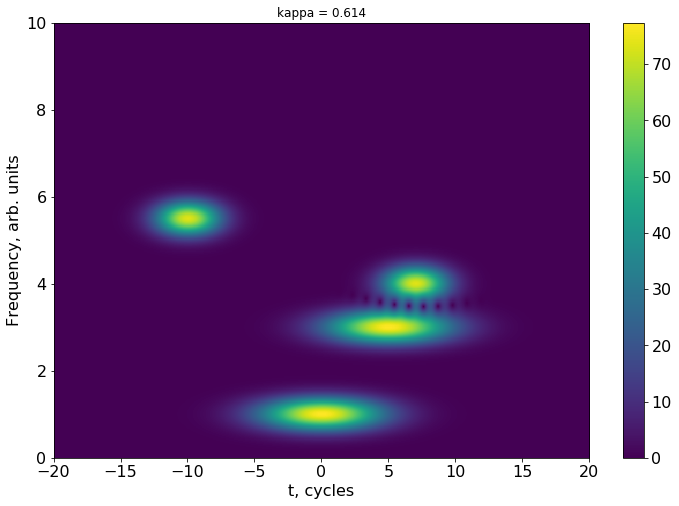

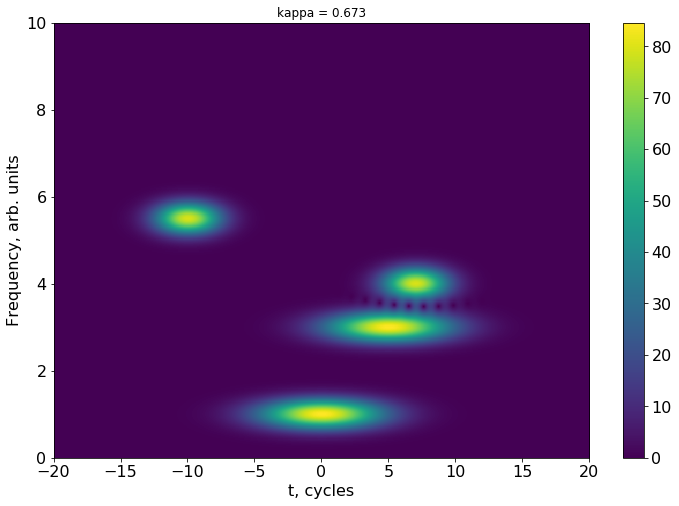

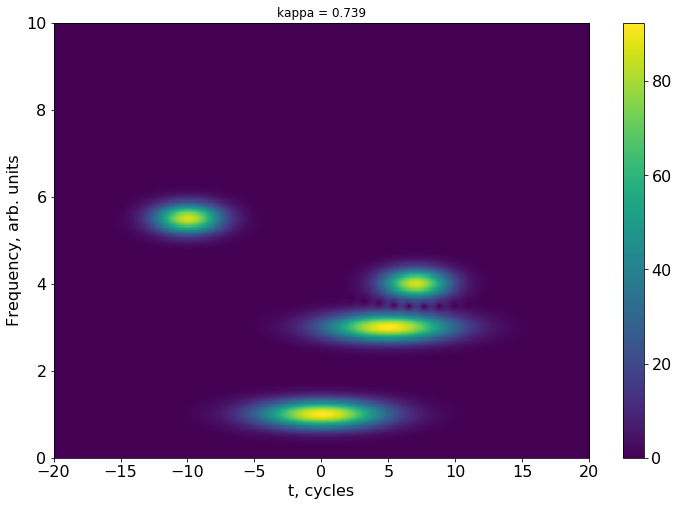

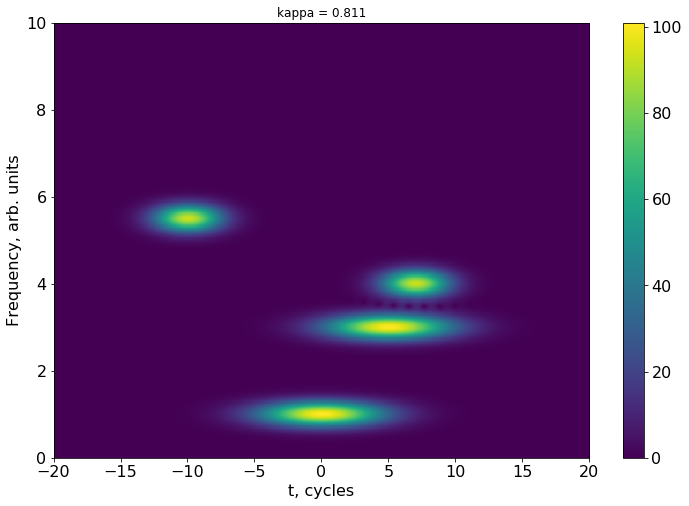

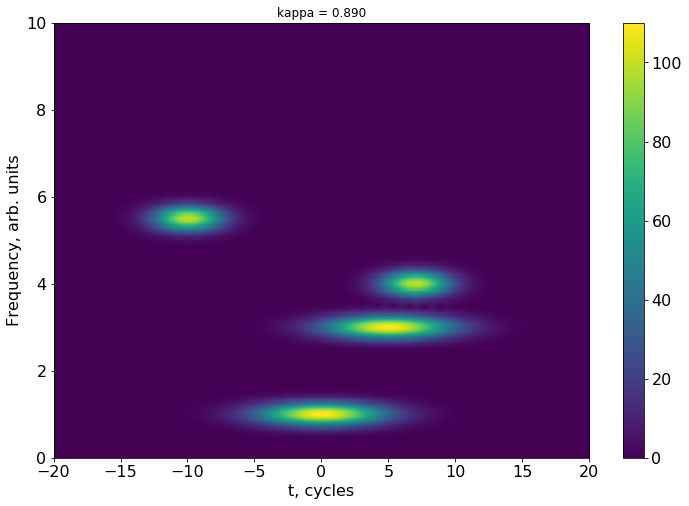

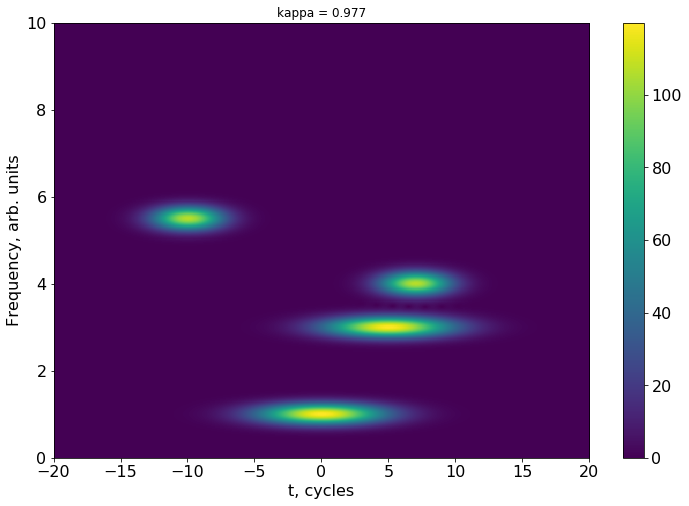

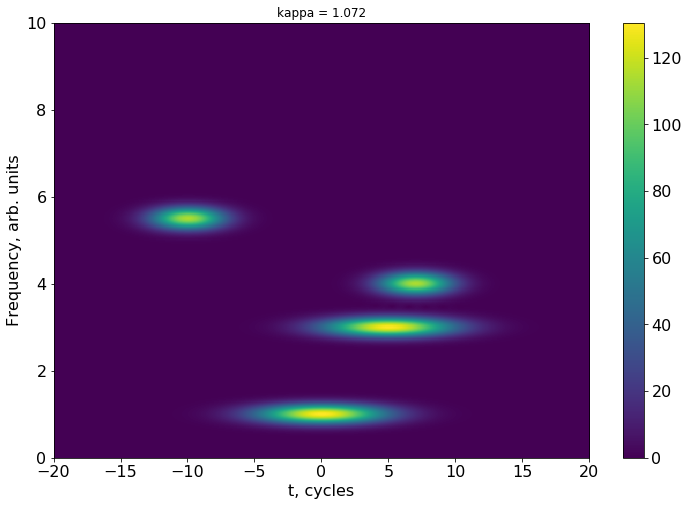

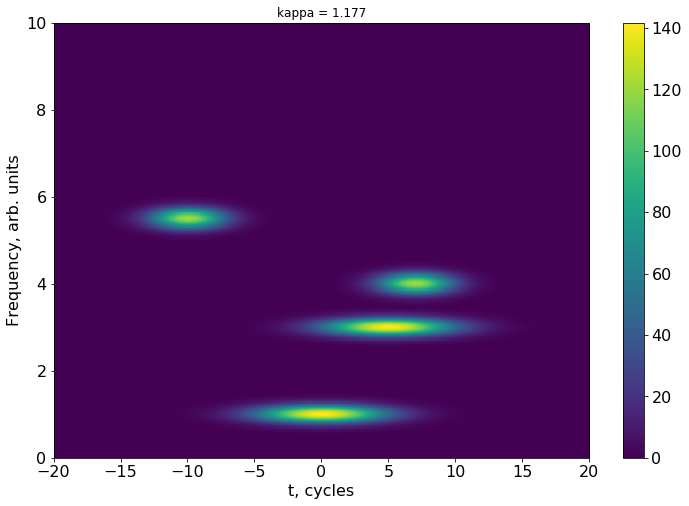

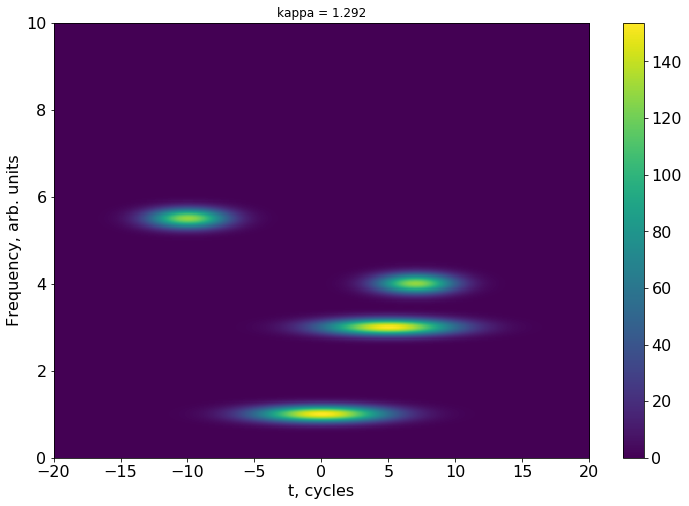

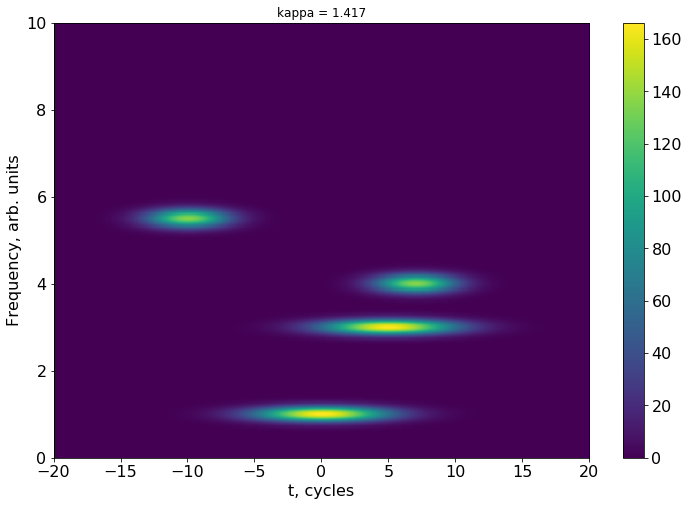

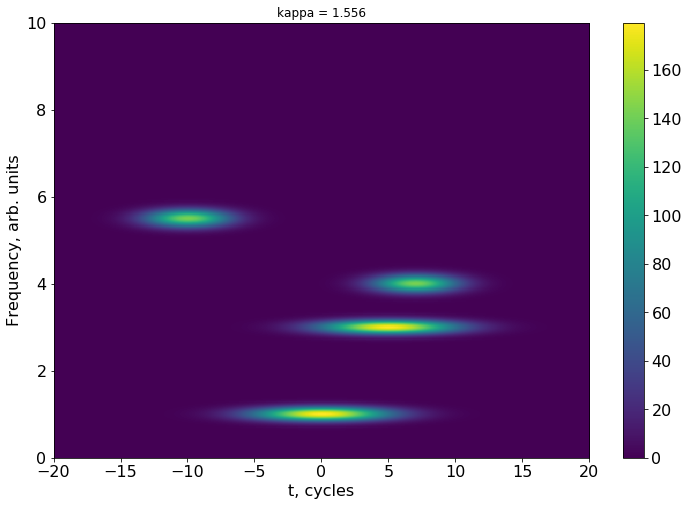

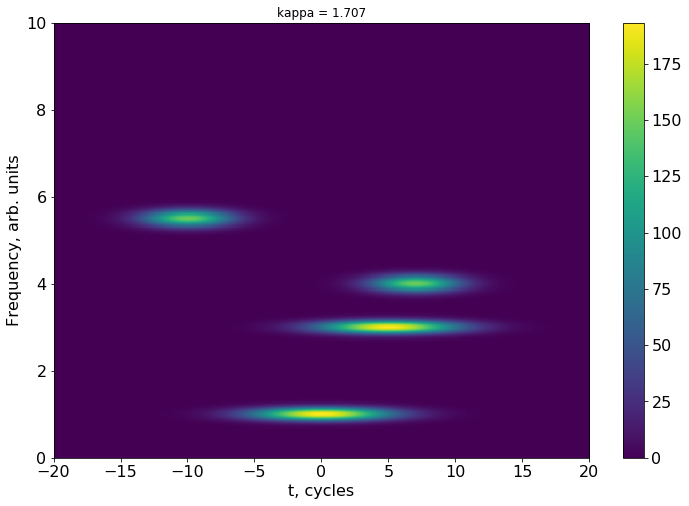

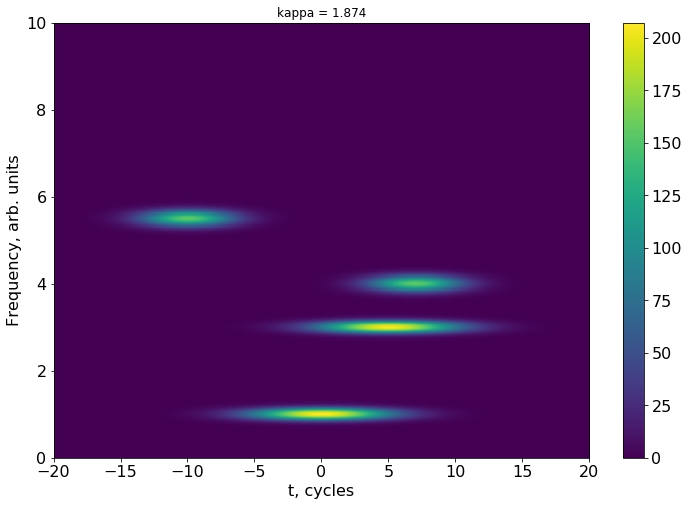

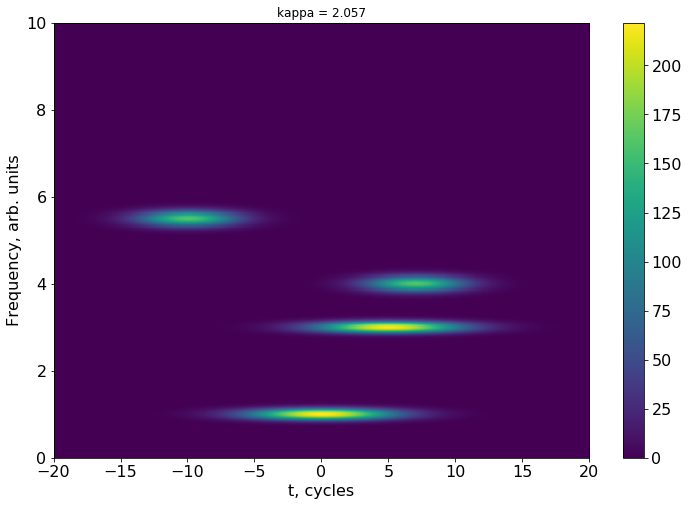

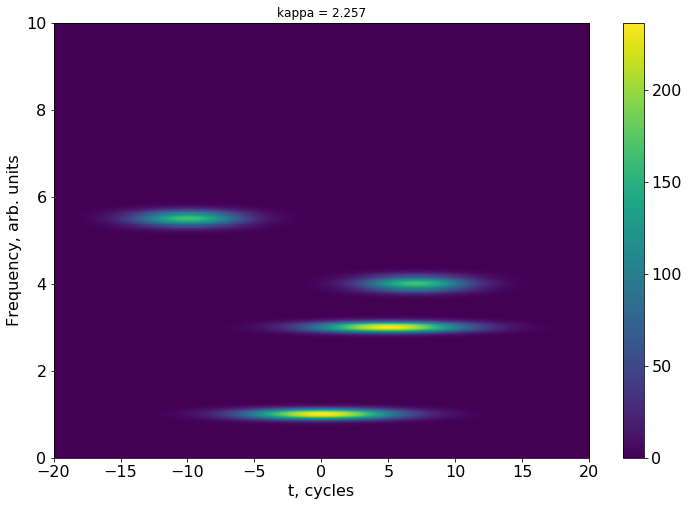

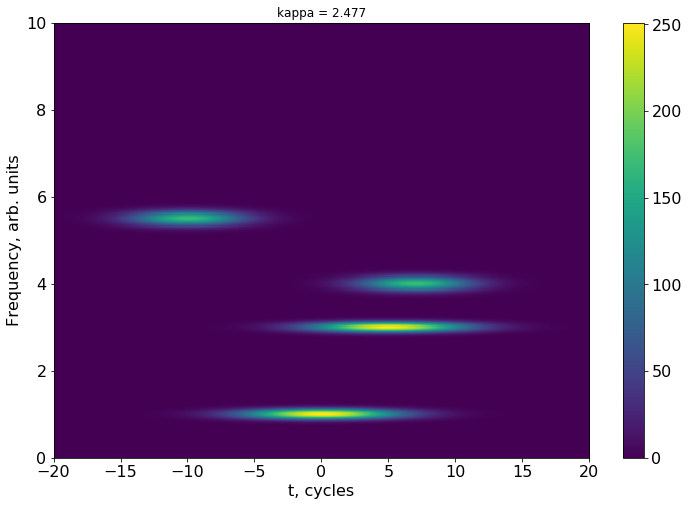

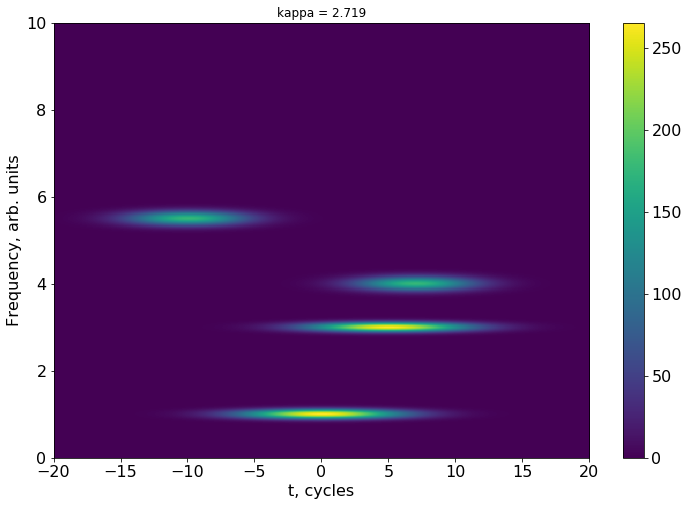

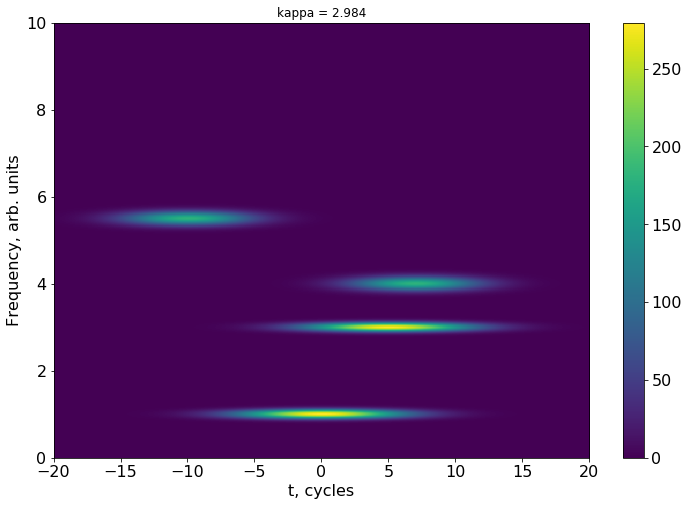

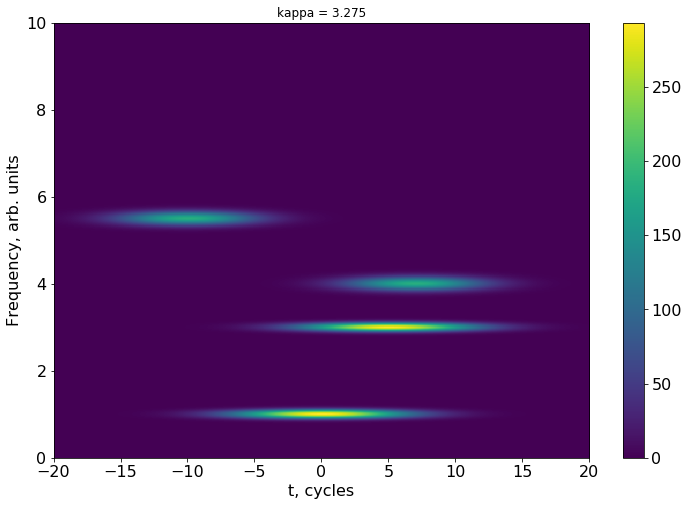

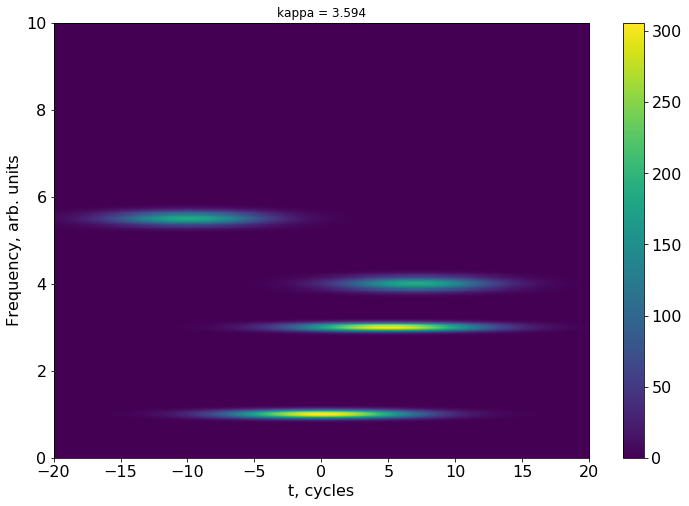

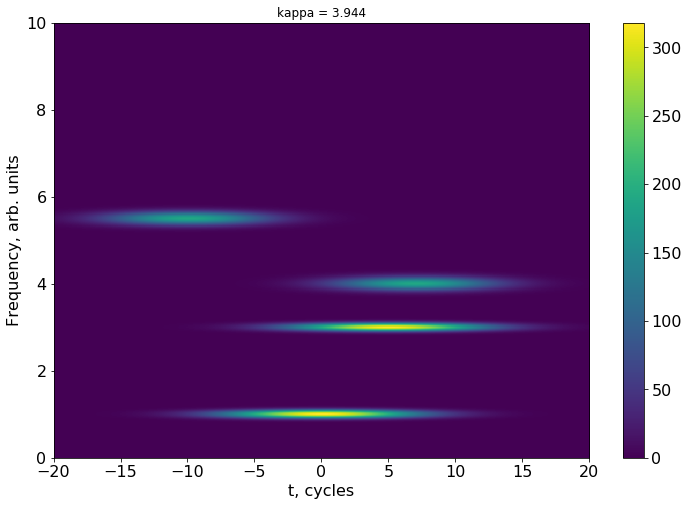

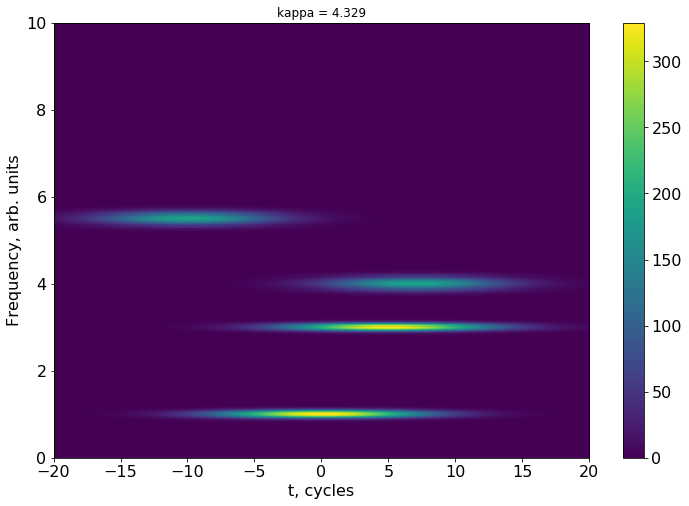

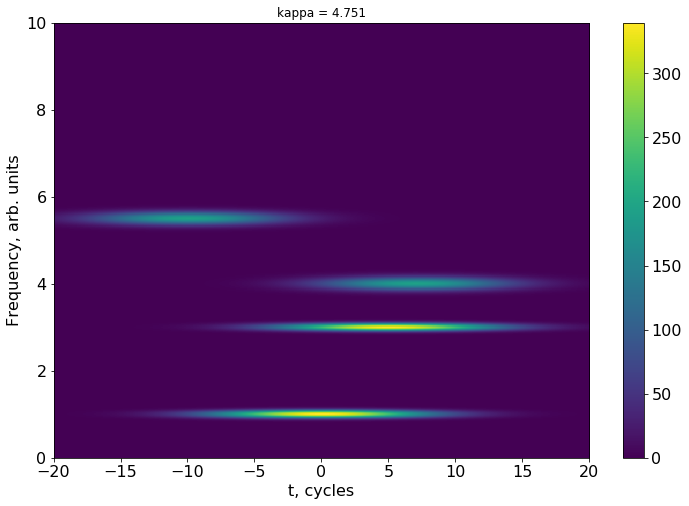

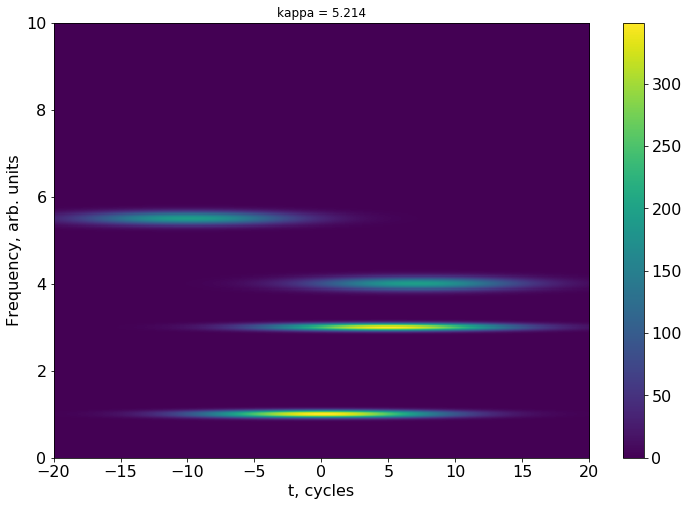

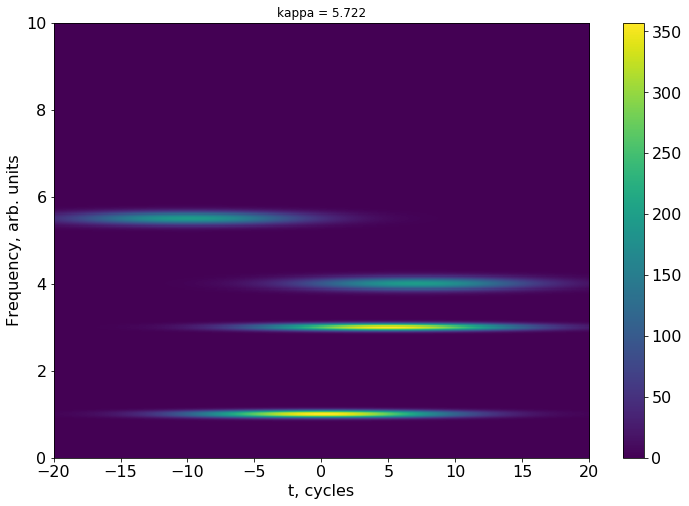

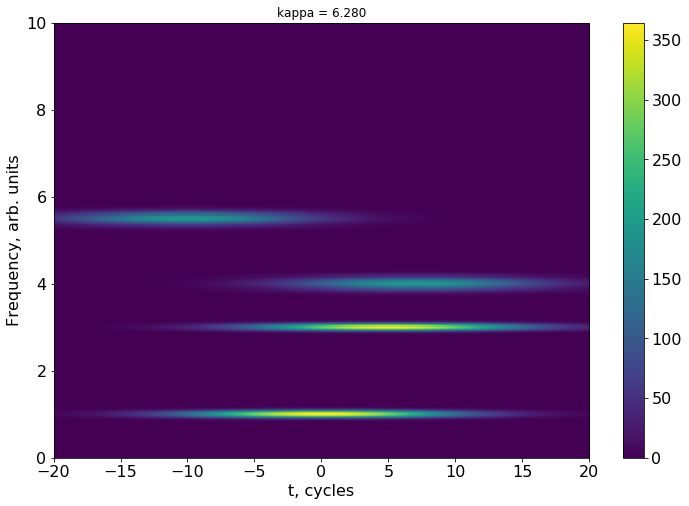

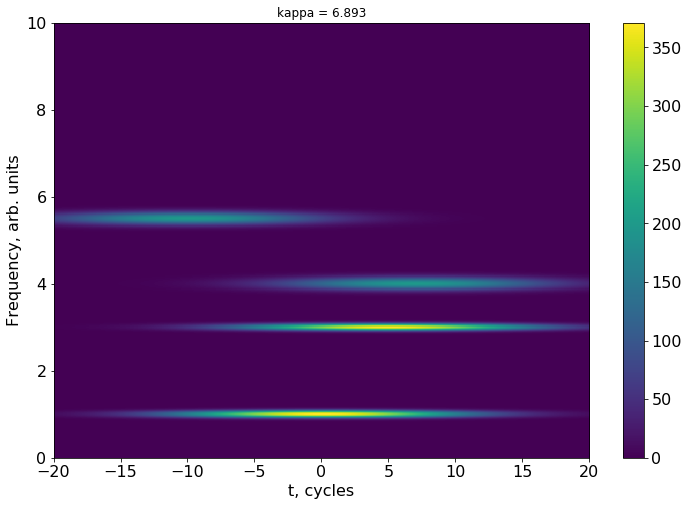

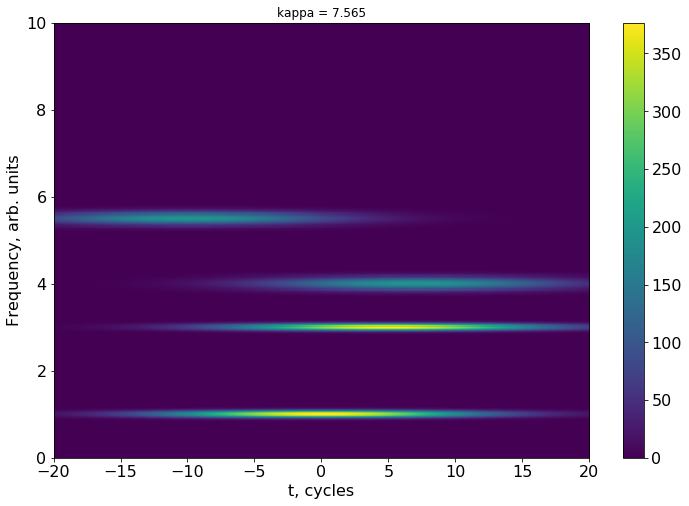

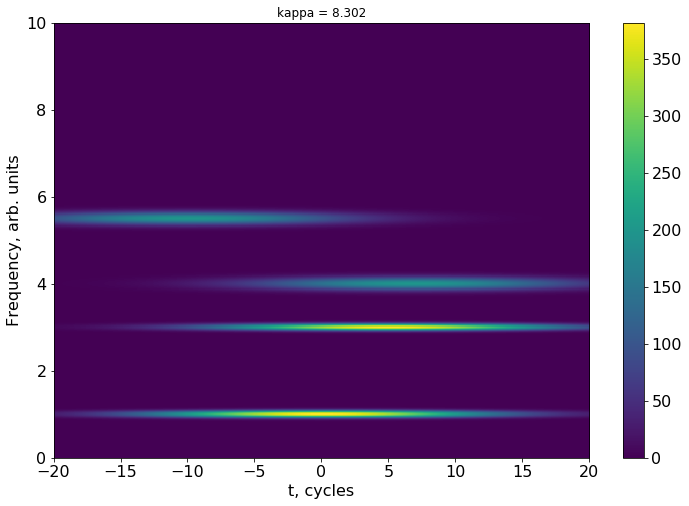

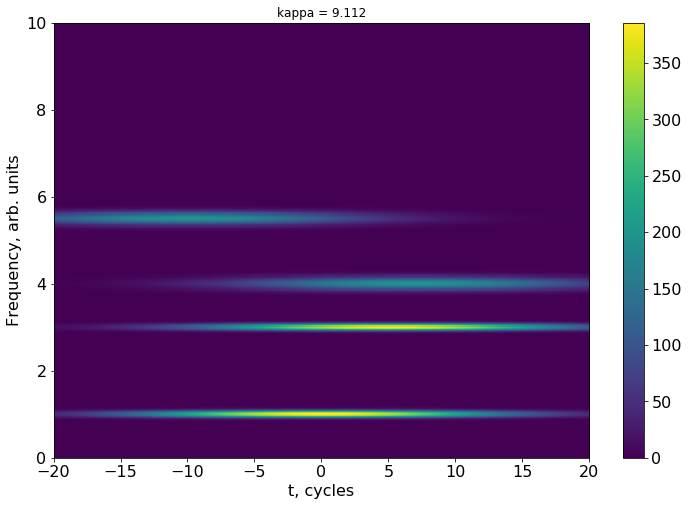

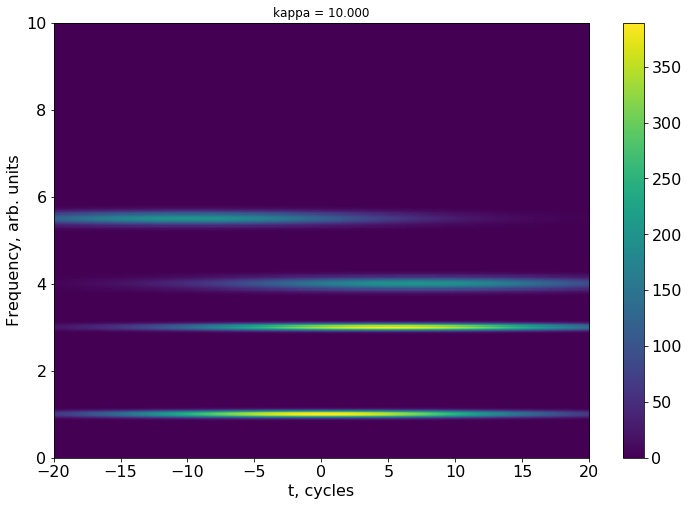

In [52]:
thetas = linspace(log(0.001), log(10), 100)

for theta in thetas:
    kappa = exp(theta)
    window_width_given = kappa*2*pi
    nwindowsteps_given = 1000

    my_imshow(t, w, get_specgram(window_width=window_width_given, nwindowsteps=nwindowsteps_given), 
          title="Specgram", xlabel="t, cycles", ylabel="Frequency, arb. units")
    plt.ylim(0, 10)
    name = 'image_' + str(theta) + '.png'
    plt.title('kappa = %.3f' %kappa)
    plt.savefig(name)
    plt.show()

In [53]:
from PIL import Image
images = []

for r in linspace(log(0.001), log(10), 100):
    name = 'image_' + str(r) + '.png'
    r += 1
    images.append(Image.open(name))
    
images[0].save('result.gif', save_all=True, append_images=images[1:], optimize=False, duration=480, loop=0)